In [1]:
import glob
import os
import pandas as pd
from io import StringIO
from matplotlib import pyplot as plt
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')
import numpy as np
from glob import glob

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

plt.rc('font', family='serif')#, serif='Times')
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
plt.rc('axes', labelsize=12)
plt.rc('legend', fontsize=10)
#plt.rcParams['mathtext.fontset'] = 'stix'
#plt.rcParams['font.family'] = 'STIXGeneral'
params = {
#'text.usetex': True,
#'font.size': 15,
#'text.latex.unicode': True
}
plt.rcParams.update(params)

In [ ]:
#!for cutoff in {0,1,2,3,4,5,6,7,8,9,10,12,15,20,30,40,50,70,100}; do ./metagraph build -k 20 -o contigs/SRR403017_kmc_$cutoff --mode canonical -p 20 --mem-cap-gb 10 --kmc --min-count $((cutoff+1)) ./representations/SRR403017.kmc; done

In [ ]:
#!for graph in SRR*_kmc_*.dbg; do for prune in {0..20}; do ../metagraph assemble --unitigs --prune-end $prune -o ${graph%.dbg}_$prune $graph; done; done

In [3]:
!ls ../../metagraph/build/contigs/

SRR403017_kmc_0_0.dbg	       SRR403017_kmc_3_1.dbg
SRR403017_kmc_0_0.fasta.gz     SRR403017_kmc_3_1.fasta.gz
SRR403017_kmc_0_10.dbg	       SRR403017_kmc_3_20.dbg
SRR403017_kmc_0_10.fasta.gz    SRR403017_kmc_3_20.fasta.gz
SRR403017_kmc_0_11.dbg	       SRR403017_kmc_3_2.dbg
SRR403017_kmc_0_11.fasta.gz    SRR403017_kmc_3_2.fasta.gz
SRR403017_kmc_0_12.dbg	       SRR403017_kmc_3_3.dbg
SRR403017_kmc_0_12.fasta.gz    SRR403017_kmc_3_3.fasta.gz
SRR403017_kmc_0_13.dbg	       SRR403017_kmc_3_4.dbg
SRR403017_kmc_0_13.fasta.gz    SRR403017_kmc_3_4.fasta.gz
SRR403017_kmc_0_14.dbg	       SRR403017_kmc_3_5.dbg
SRR403017_kmc_0_14.fasta.gz    SRR403017_kmc_3_5.fasta.gz
SRR403017_kmc_0_15.dbg	       SRR403017_kmc_3_6.dbg
SRR403017_kmc_0_15.fasta.gz    SRR403017_kmc_3_6.fasta.gz
SRR403017_kmc_0_16.dbg	       SRR403017_kmc_3_7.dbg
SRR403017_kmc_0_16.fasta.gz    SRR403017_kmc_3_7.fasta.gz
SRR403017_kmc_0_17.dbg	       SRR403017_kmc_3_8.dbg
SRR403017_kmc_0_17.fasta.gz    SRR403017_kmc_3_8.fasta.gz
SRR403017

In [4]:
sizes = []
cutoffs = []
dead_end_params = []

for x in glob('../../metagraph/build/contigs/*.gz'):
    sizes.append(os.path.getsize(x) / 2**20)
    cutoffs.append(int(x.split('_')[2]))
    dead_end_params.append(int(x.split('_')[3].split('.')[0]))

sizes = np.array(sizes)
cutoffs = np.array(cutoffs, dtype=int)
dead_end_params = np.array(dead_end_params, dtype=int)

In [5]:
stats = {}
for x in glob('../../metagraph/build/contigs/SRR403017_kmc_*_*.dbg'):
    stats[x] = !../../metagraph/build/metagraph stats --count-dummy -p 20 {x}
    print(stats[x])

['Statistics for graph ../../metagraph/build/contigs/SRR403017_kmc_0_15.dbg', '====================== GRAPH STATS =====================', 'k: 20', 'nodes (k): 73015063', 'canonical mode: yes', '========================================================', '====================== BOSS STATS ======================', 'k: 20', 'nodes (k-1): 71501686', 'edges ( k ): 73015063', 'state: fast', "W stats: {'$': 1125156, 'A': 19813107, 'C': 16151672, 'G': 16048032, 'T': 19877096, 'N': 0}", "F stats: {'$': 5, 'A': 20114129, 'C': 16400044, 'G': 16340052, 'T': 20160833, 'N': 0}", 'dummy source edges: 10488545', 'dummy sink edges: 1125155', '========================================================']
['Statistics for graph ../../metagraph/build/contigs/SRR403017_kmc_0_16.dbg', '====================== GRAPH STATS =====================', 'k: 20', 'nodes (k): 72266913', 'canonical mode: yes', '========================================================', '====================== BOSS STATS ====================

['Statistics for graph ../../metagraph/build/contigs/SRR403017_kmc_0_7.dbg', '====================== GRAPH STATS =====================', 'k: 20', 'nodes (k): 77214062', 'canonical mode: yes', '========================================================', '====================== BOSS STATS ======================', 'k: 20', 'nodes (k-1): 75478599', 'edges ( k ): 77214062', 'state: fast', "W stats: {'$': 1236329, 'A': 20852063, 'C': 17155343, 'G': 17020824, 'T': 20949503, 'N': 0}", "F stats: {'$': 5, 'A': 21174857, 'C': 17434772, 'G': 17350471, 'T': 21253957, 'N': 0}", 'dummy source edges: 11438517', 'dummy sink edges: 1236328', '========================================================']
['Statistics for graph ../../metagraph/build/contigs/SRR403017_kmc_0_8.dbg', '====================== GRAPH STATS =====================', 'k: 20', 'nodes (k): 76780410', 'canonical mode: yes', '========================================================', '====================== BOSS STATS ======================

['Statistics for graph ../../metagraph/build/contigs/SRR403017_kmc_0_14.dbg', '====================== GRAPH STATS =====================', 'k: 20', 'nodes (k): 73621938', 'canonical mode: yes', '========================================================', '====================== BOSS STATS ======================', 'k: 20', 'nodes (k-1): 72083297', 'edges ( k ): 73621938', 'state: fast', "W stats: {'$': 1137830, 'A': 19962990, 'C': 16297579, 'G': 16191496, 'T': 20032043, 'N': 0}", "F stats: {'$': 5, 'A': 20266784, 'C': 16549313, 'G': 16487692, 'T': 20318144, 'N': 0}", 'dummy source edges: 10595846', 'dummy sink edges: 1137829', '========================================================']
['Statistics for graph ../../metagraph/build/contigs/SRR403017_kmc_100_14.dbg', '====================== GRAPH STATS =====================', 'k: 20', 'nodes (k): 183998', 'canonical mode: yes', '========================================================', '====================== BOSS STATS ====================

['Statistics for graph ../../metagraph/build/contigs/SRR403017_kmc_100_6.dbg', '====================== GRAPH STATS =====================', 'k: 20', 'nodes (k): 197091', 'canonical mode: yes', '========================================================', '====================== BOSS STATS ======================', 'k: 20', 'nodes (k-1): 195067', 'edges ( k ): 197091', 'state: fast', "W stats: {'$': 1828, 'A': 52597, 'C': 44919, 'G': 44765, 'T': 52982, 'N': 0}", "F stats: {'$': 5, 'A': 53091, 'C': 45352, 'G': 45168, 'T': 53475, 'N': 0}", 'dummy source edges: 25840', 'dummy sink edges: 1827', '========================================================']
['Statistics for graph ../../metagraph/build/contigs/SRR403017_kmc_100_7.dbg', '====================== GRAPH STATS =====================', 'k: 20', 'nodes (k): 194870', 'canonical mode: yes', '========================================================', '====================== BOSS STATS ======================', 'k: 20', 'nodes (k-1): 192952', 'e

['Statistics for graph ../../metagraph/build/contigs/SRR403017_kmc_10_18.dbg', '====================== GRAPH STATS =====================', 'k: 20', 'nodes (k): 2519196', 'canonical mode: yes', '========================================================', '====================== BOSS STATS ======================', 'k: 20', 'nodes (k-1): 2488896', 'edges ( k ): 2519196', 'state: fast', "W stats: {'$': 26319, 'A': 703664, 'C': 544490, 'G': 541538, 'T': 703185, 'N': 0}", "F stats: {'$': 5, 'A': 710521, 'C': 550131, 'G': 547171, 'T': 711368, 'N': 0}", 'dummy source edges: 319280', 'dummy sink edges: 26318', '========================================================']
['Statistics for graph ../../metagraph/build/contigs/SRR403017_kmc_10_19.dbg', '====================== GRAPH STATS =====================', 'k: 20', 'nodes (k): 2488228', 'canonical mode: yes', '========================================================', '====================== BOSS STATS ======================', 'k: 20', 'nodes (k-

['Statistics for graph ../../metagraph/build/contigs/SRR403017_kmc_1_10.dbg', '====================== GRAPH STATS =====================', 'k: 20', 'nodes (k): 28323291', 'canonical mode: yes', '========================================================', '====================== BOSS STATS ======================', 'k: 20', 'nodes (k-1): 27808361', 'edges ( k ): 28323291', 'state: fast', "W stats: {'$': 450607, 'A': 7793975, 'C': 6154497, 'G': 6121122, 'T': 7803090, 'N': 0}", "F stats: {'$': 5, 'A': 7922395, 'C': 6250250, 'G': 6229321, 'T': 7921320, 'N': 0}", 'dummy source edges: 4513119', 'dummy sink edges: 450606', '========================================================']
['Statistics for graph ../../metagraph/build/contigs/SRR403017_kmc_1_11.dbg', '====================== GRAPH STATS =====================', 'k: 20', 'nodes (k): 27989809', 'canonical mode: yes', '========================================================', '====================== BOSS STATS ======================', 'k: 20

['Statistics for graph ../../metagraph/build/contigs/SRR403017_kmc_12_10.dbg', '====================== GRAPH STATS =====================', 'k: 20', 'nodes (k): 2207530', 'canonical mode: yes', '========================================================', '====================== BOSS STATS ======================', 'k: 20', 'nodes (k-1): 2176520', 'edges ( k ): 2207530', 'state: fast', "W stats: {'$': 27550, 'A': 614042, 'C': 477091, 'G': 474808, 'T': 614039, 'N': 0}", "F stats: {'$': 5, 'A': 621288, 'C': 483207, 'G': 480564, 'T': 622466, 'N': 0}", 'dummy source edges: 332971', 'dummy sink edges: 27549', '========================================================']
['Statistics for graph ../../metagraph/build/contigs/SRR403017_kmc_12_11.dbg', '====================== GRAPH STATS =====================', 'k: 20', 'nodes (k): 2176787', 'canonical mode: yes', '========================================================', '====================== BOSS STATS ======================', 'k: 20', 'nodes (k-

['Statistics for graph ../../metagraph/build/contigs/SRR403017_kmc_12_3.dbg', '====================== GRAPH STATS =====================', 'k: 20', 'nodes (k): 2554360', 'canonical mode: yes', '========================================================', '====================== BOSS STATS ======================', 'k: 20', 'nodes (k-1): 2504101', 'edges ( k ): 2554360', 'state: fast', "W stats: {'$': 46061, 'A': 707557, 'C': 548692, 'G': 546439, 'T': 705611, 'N': 0}", "F stats: {'$': 5, 'A': 719934, 'C': 558863, 'G': 556201, 'T': 719357, 'N': 0}", 'dummy source edges: 538083', 'dummy sink edges: 46060', '========================================================']
['Statistics for graph ../../metagraph/build/contigs/SRR403017_kmc_12_4.dbg', '====================== GRAPH STATS =====================', 'k: 20', 'nodes (k): 2480129', 'canonical mode: yes', '========================================================', '====================== BOSS STATS ======================', 'k: 20', 'nodes (k-1)

['Statistics for graph ../../metagraph/build/contigs/SRR403017_kmc_15_12.dbg', '====================== GRAPH STATS =====================', 'k: 20', 'nodes (k): 1614005', 'canonical mode: yes', '========================================================', '====================== BOSS STATS ======================', 'k: 20', 'nodes (k-1): 1593929', 'edges ( k ): 1614005', 'state: fast', "W stats: {'$': 17501, 'A': 446977, 'C': 352182, 'G': 350087, 'T': 447258, 'N': 0}", "F stats: {'$': 5, 'A': 451400, 'C': 356015, 'G': 353898, 'T': 452687, 'N': 0}", 'dummy source edges: 217223', 'dummy sink edges: 17500', '========================================================']
['Statistics for graph ../../metagraph/build/contigs/SRR403017_kmc_15_13.dbg', '====================== GRAPH STATS =====================', 'k: 20', 'nodes (k): 1593884', 'canonical mode: yes', '========================================================', '====================== BOSS STATS ======================', 'k: 20', 'nodes (k-

['Statistics for graph ../../metagraph/build/contigs/SRR403017_kmc_15_5.dbg', '====================== GRAPH STATS =====================', 'k: 20', 'nodes (k): 1801910', 'canonical mode: yes', '========================================================', '====================== BOSS STATS ======================', 'k: 20', 'nodes (k-1): 1772692', 'edges ( k ): 1801910', 'state: fast', "W stats: {'$': 26291, 'A': 497809, 'C': 391353, 'G': 389153, 'T': 497304, 'N': 0}", "F stats: {'$': 5, 'A': 504635, 'C': 397130, 'G': 394785, 'T': 505355, 'N': 0}", 'dummy source edges: 318034', 'dummy sink edges: 26290', '========================================================']
['Statistics for graph ../../metagraph/build/contigs/SRR403017_kmc_15_6.dbg', '====================== GRAPH STATS =====================', 'k: 20', 'nodes (k): 1764801', 'canonical mode: yes', '========================================================', '====================== BOSS STATS ======================', 'k: 20', 'nodes (k-1)

['Statistics for graph ../../metagraph/build/contigs/SRR403017_kmc_20_12.dbg', '====================== GRAPH STATS =====================', 'k: 20', 'nodes (k): 1145268', 'canonical mode: yes', '========================================================', '====================== BOSS STATS ======================', 'k: 20', 'nodes (k-1): 1131781', 'edges ( k ): 1145268', 'state: fast', "W stats: {'$': 11710, 'A': 316197, 'C': 251469, 'G': 249769, 'T': 316123, 'N': 0}", "F stats: {'$': 5, 'A': 319057, 'C': 254087, 'G': 252283, 'T': 319836, 'N': 0}", 'dummy source edges: 148794', 'dummy sink edges: 11709', '========================================================']
['Statistics for graph ../../metagraph/build/contigs/SRR403017_kmc_20_13.dbg', '====================== GRAPH STATS =====================', 'k: 20', 'nodes (k): 1131365', 'canonical mode: yes', '========================================================', '====================== BOSS STATS ======================', 'k: 20', 'nodes (k-

['Statistics for graph ../../metagraph/build/contigs/SRR403017_kmc_20_5.dbg', '====================== GRAPH STATS =====================', 'k: 20', 'nodes (k): 1265118', 'canonical mode: yes', '========================================================', '====================== BOSS STATS ======================', 'k: 20', 'nodes (k-1): 1245853', 'edges ( k ): 1265118', 'state: fast', "W stats: {'$': 17252, 'A': 348431, 'C': 276781, 'G': 275009, 'T': 347645, 'N': 0}", "F stats: {'$': 5, 'A': 352682, 'C': 280660, 'G': 278699, 'T': 353072, 'N': 0}", 'dummy source edges: 213750', 'dummy sink edges: 17251', '========================================================']
['Statistics for graph ../../metagraph/build/contigs/SRR403017_kmc_20_6.dbg', '====================== GRAPH STATS =====================', 'k: 20', 'nodes (k): 1241215', 'canonical mode: yes', '========================================================', '====================== BOSS STATS ======================', 'k: 20', 'nodes (k-1)

limit_output extension: Maximum message size of 100000 exceeded with 100668 characters

In [6]:
dummy_source_nodes = []
dummy_sink_nodes = []
real_kmers = []

for (c, d) in zip(cutoffs, dead_end_params):
    graph = '../../metagraph/build/contigs/SRR403017_kmc_{}_{}.dbg'.format(c, d)

    if graph not in stats:
        dummy_source_nodes.append(np.nan)
        dummy_sink_nodes.append(np.nan)
        real_kmers.append(np.nan)
    else:
        out = stats[graph]
        dummy_source_nodes.append(int(out[13].split()[-1]))
        dummy_sink_nodes.append(int(out[14].split()[-1]))
        real_kmers.append(int(out[9].split()[-1]) - dummy_source_nodes[-1] - dummy_sink_nodes[-1])

dummy_source_nodes = np.array(dummy_source_nodes)
dummy_sink_nodes = np.array(dummy_sink_nodes)
real_kmers = np.array(real_kmers)

<Figure size 1000x800 with 0 Axes>

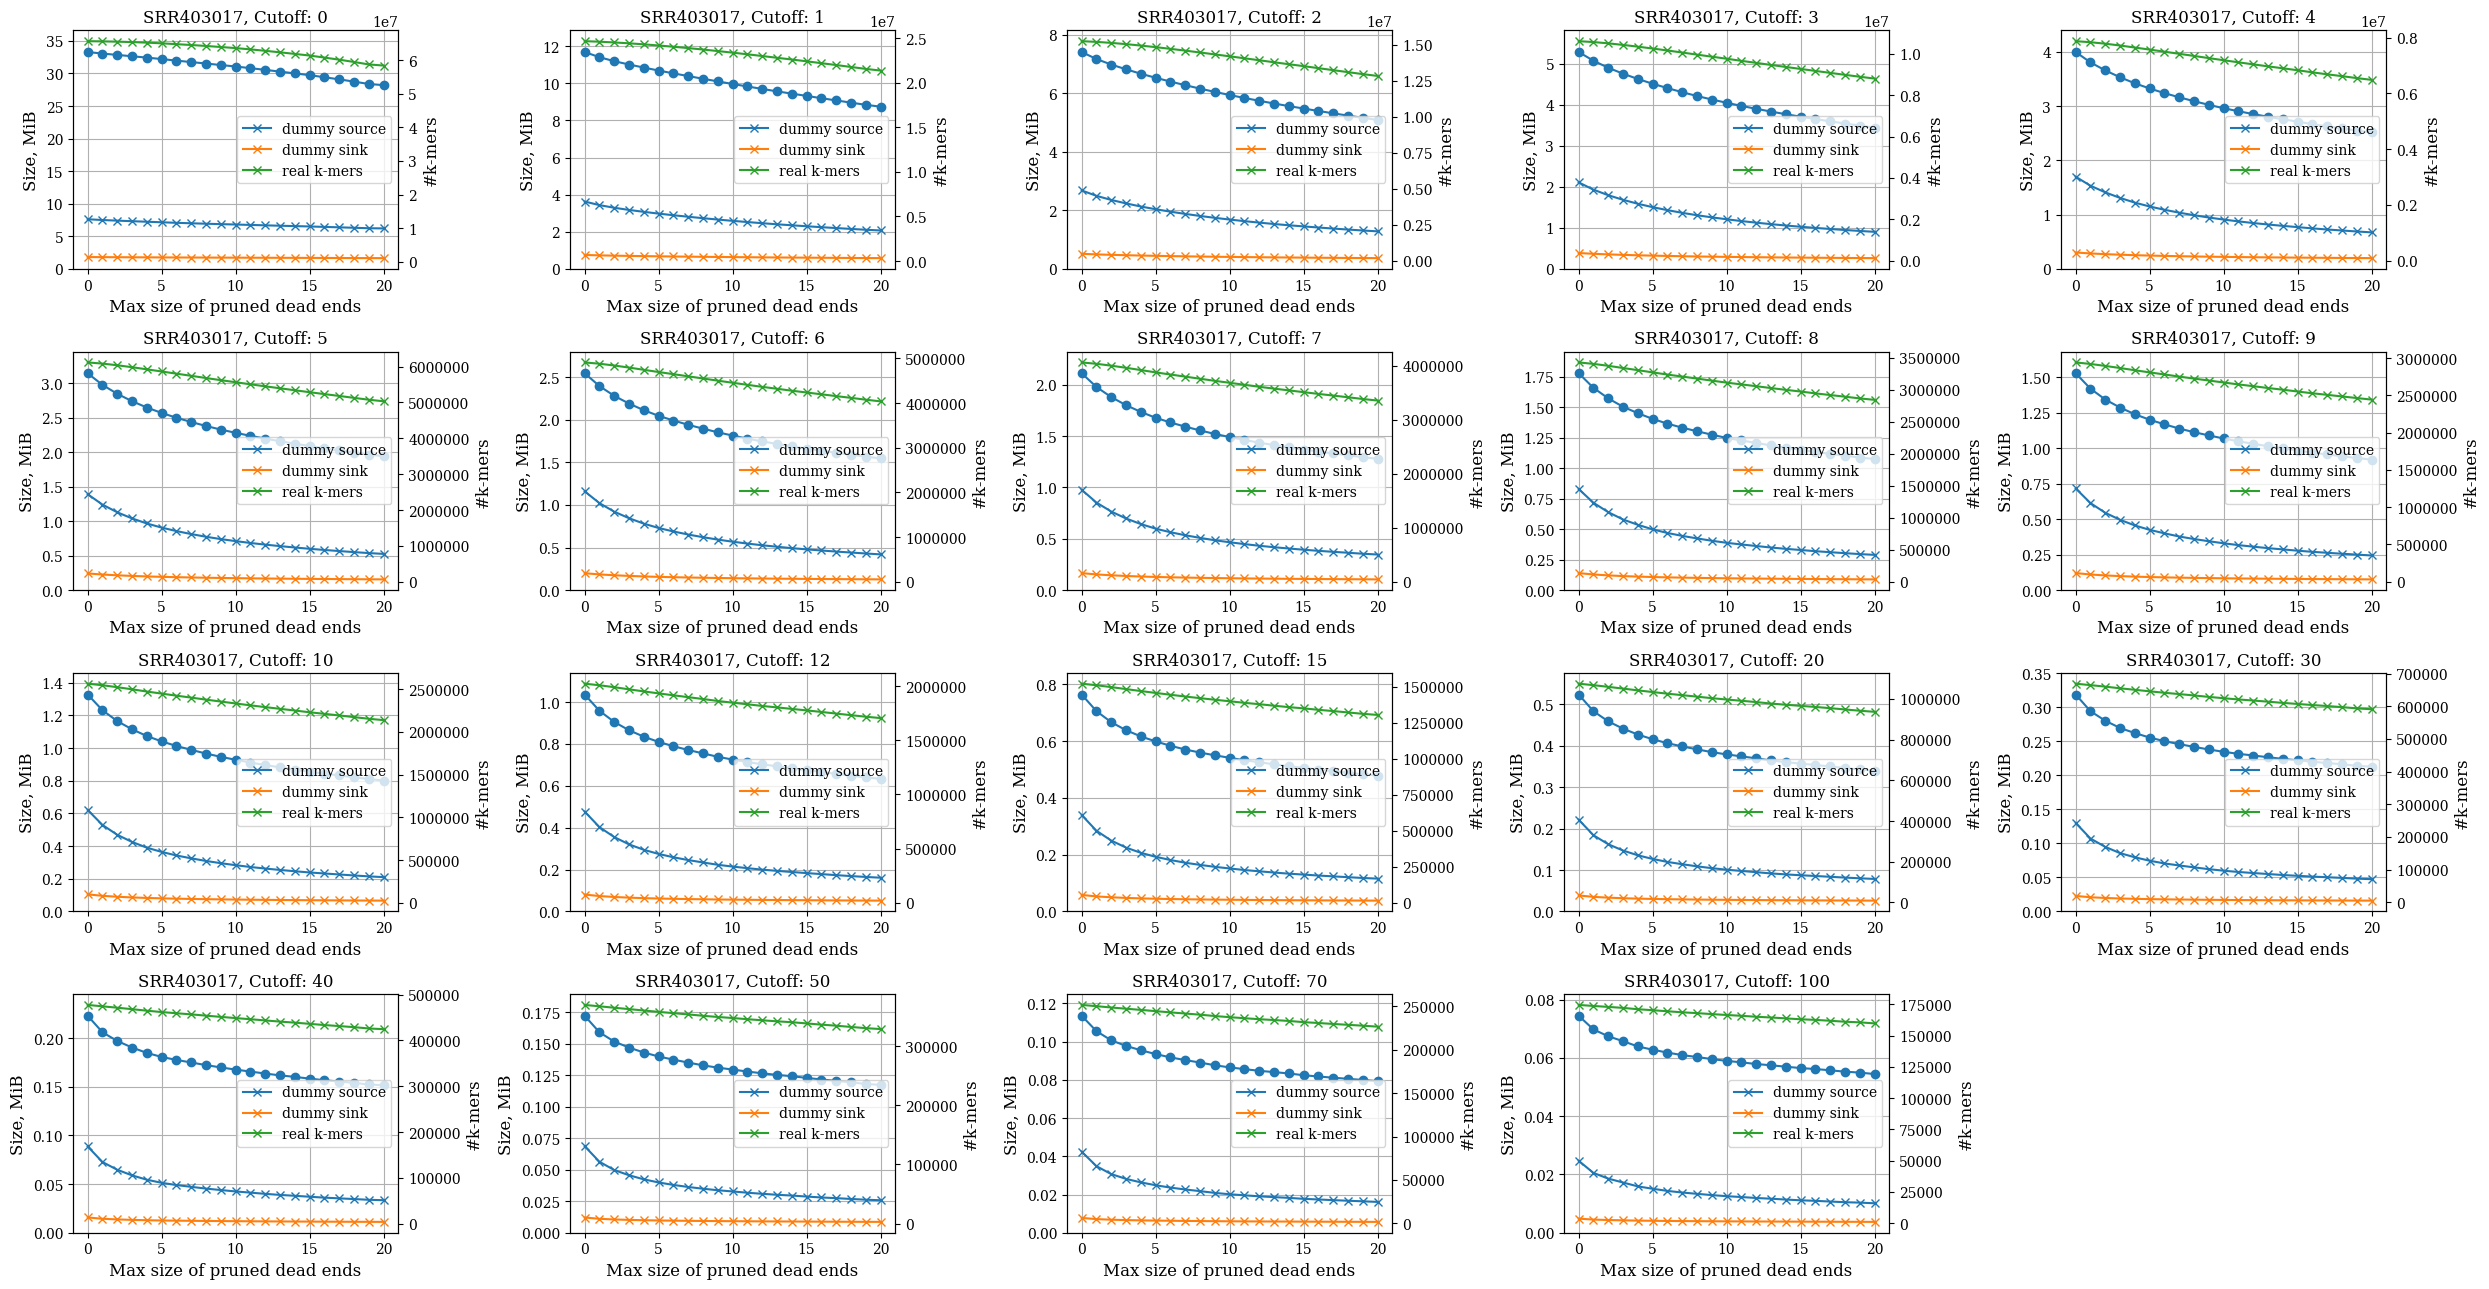

In [8]:
num_plot_in_row = 5
cutoff_ar = np.unique(cutoffs)
num_plots = cutoff_ar.size
fig, axes = plt.subplots((num_plots + num_plot_in_row - 1) // num_plot_in_row, num_plot_in_row,
                         figsize=(5 * num_plot_in_row, 3 * (num_plots + num_plot_in_row - 1) // num_plot_in_row))
for i in range(num_plots):
    cutoff = cutoff_ar[i]
    ax = axes[i // num_plot_in_row, i % num_plot_in_row]
    mask = (cutoffs == cutoff)
    indexes = np.argsort(dead_end_params[mask])
    ax.plot(dead_end_params[mask][indexes], sizes[mask][indexes], marker='o', label='contigs')
    ax.set_ylim([0, sizes[mask].max() * 1.1])
    ax.set_title('SRR403017, Cutoff: {}'.format(cutoff))
    ax.set_ylabel('Size, MiB')
    ax.set_xlabel('Max size of pruned dead ends')

    right_ax = ax.twinx()
    right_ax.plot(dead_end_params[mask][indexes], dummy_source_nodes[mask][indexes], marker='x', label='dummy source')
    right_ax.plot(dead_end_params[mask][indexes], dummy_sink_nodes[mask][indexes], marker='x', label='dummy sink')
    right_ax.plot(dead_end_params[mask][indexes], real_kmers[mask][indexes], marker='x', label='real k-mers')
    right_ax.set_ylabel('#k-mers')
    right_ax.legend(loc='best')
    #right_ax.set_yscale('log')

    ax.grid()

for i in range(num_plots, ((num_plots - 1) // num_plot_in_row + 1) * num_plot_in_row):
    axes[i // num_plot_in_row, i % num_plot_in_row].axis('off')

plt.tight_layout()
plt.show()

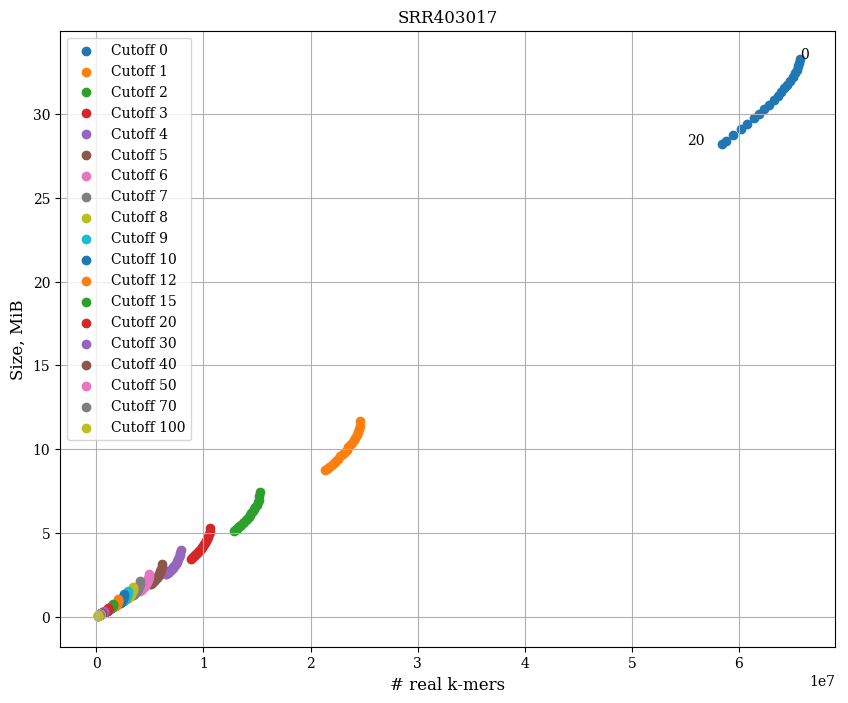

In [9]:
plt.figure(figsize=(10,8))
for i in range(num_plots):
    cutoff = cutoff_ar[i]
    mask = (cutoffs == cutoff)
    plt.scatter(real_kmers[mask], sizes[mask], label='Cutoff {}'.format(cutoff))
    if i == 0:
        plt.text(real_kmers[mask][0], sizes[mask][0], dead_end_params[mask][0])
        plt.text(real_kmers[mask][-1] - real_kmers.max() * 0.05, sizes[mask][-1], dead_end_params[mask][-1])

plt.title('SRR403017')
#plt.yscale('log')
#plt.xscale('log')
plt.xlabel('# real k-mers')
plt.ylabel('Size, MiB')
plt.grid()
plt.legend(loc='best')
plt.show()

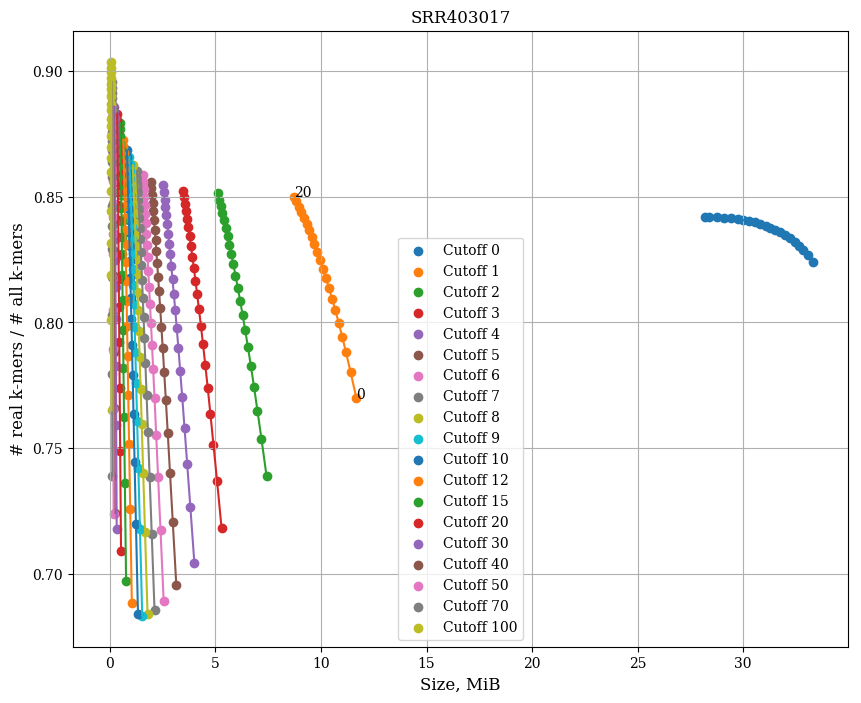

In [10]:
plt.figure(figsize=(10,8))
for i in range(num_plots):
    cutoff = cutoff_ar[i]
    mask = (cutoffs == cutoff)
    plt.scatter(sizes[mask], real_kmers[mask] / (real_kmers[mask] + dummy_sink_nodes[mask] + dummy_source_nodes[mask]), label='Cutoff {}'.format(cutoff))
    plt.plot(sizes[mask], real_kmers[mask] / (real_kmers[mask] + dummy_sink_nodes[mask] + dummy_source_nodes[mask]))
    if i == 1:
        plt.text(sizes[mask][0], (real_kmers[mask] / (real_kmers[mask] + dummy_sink_nodes[mask] + dummy_source_nodes[mask]))[0], dead_end_params[mask][0])
        plt.text(sizes[mask][-1], (real_kmers[mask] / (real_kmers[mask] + dummy_sink_nodes[mask] + dummy_source_nodes[mask]))[-1], dead_end_params[mask][-1])

plt.title('SRR403017')
#plt.yscale('log')
#plt.xscale('log')
plt.ylabel('# real k-mers / # all k-mers')
plt.xlabel('Size, MiB')
plt.grid()
plt.legend(loc='best')
plt.show()

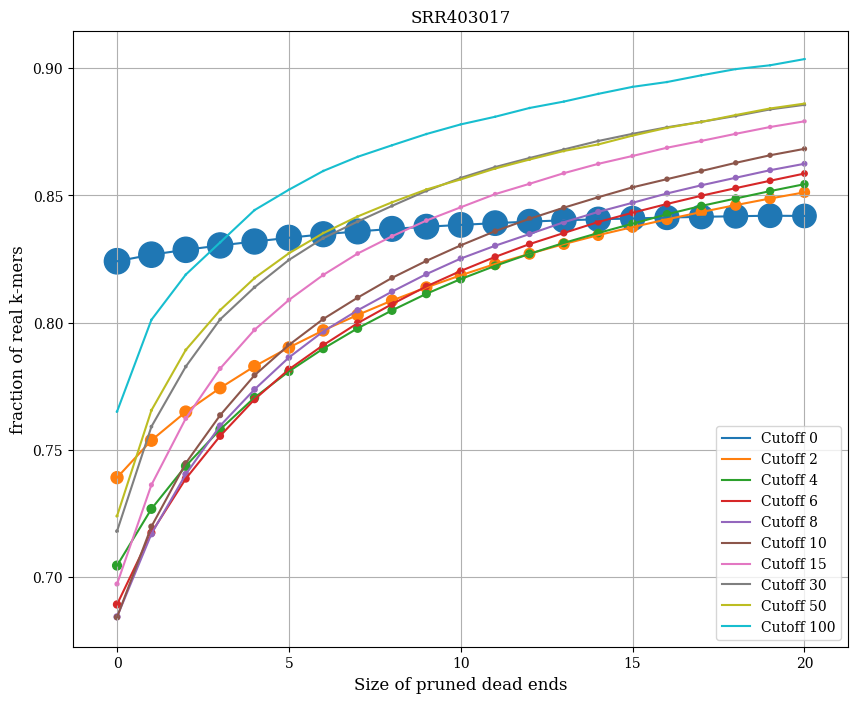

In [11]:
plt.figure(figsize=(10,8))
for i in range(num_plots)[::2]:
    cutoff = cutoff_ar[i]
    mask = (cutoffs == cutoff)
    indexes = np.argsort(dead_end_params[mask])
    plt.plot(dead_end_params[mask],
                real_kmers[mask] / (dummy_sink_nodes[mask] + dummy_source_nodes[mask] + real_kmers[mask]),
                '-',
                label='Cutoff {}'.format(cutoff))
    plt.scatter(dead_end_params[mask],
                real_kmers[mask] / (dummy_sink_nodes[mask] + dummy_source_nodes[mask] + real_kmers[mask]),
                sizes[mask] * 10)

plt.title('SRR403017')
#plt.yscale('log')
#plt.xscale('log')
plt.xlabel('Size of pruned dead ends')
plt.ylabel('fraction of real k-mers')
plt.grid()
plt.legend(loc='best')
plt.show()

### RNA-seq short-read sequencing data

In [2]:
dataset = '/cluster/work/grlab/projects/metagenome/benchmark_kingsford/data_fasta/SRR*.fasta.gz'

In [3]:
files = glob.glob(dataset)
files[:10]

['/cluster/work/grlab/projects/metagenome/benchmark_kingsford/data_fasta/SRR1035700.fasta.gz',
 '/cluster/work/grlab/projects/metagenome/benchmark_kingsford/data_fasta/SRR654041.fasta.gz',
 '/cluster/work/grlab/projects/metagenome/benchmark_kingsford/data_fasta/SRR191536.fasta.gz',
 '/cluster/work/grlab/projects/metagenome/benchmark_kingsford/data_fasta/SRR343348.fasta.gz',
 '/cluster/work/grlab/projects/metagenome/benchmark_kingsford/data_fasta/SRR805884.fasta.gz',
 '/cluster/work/grlab/projects/metagenome/benchmark_kingsford/data_fasta/SRR403016.fasta.gz',
 '/cluster/work/grlab/projects/metagenome/benchmark_kingsford/data_fasta/SRR846956.fasta.gz',
 '/cluster/work/grlab/projects/metagenome/benchmark_kingsford/data_fasta/SRR1002075.fasta.gz',
 '/cluster/work/grlab/projects/metagenome/benchmark_kingsford/data_fasta/SRR567154.fasta.gz',
 '/cluster/work/grlab/projects/metagenome/benchmark_kingsford/data_fasta/SRR1066641.fasta.gz']

In [4]:
print('Files in the dataset: {}'.format(len(files)))
print('Size of the dataset: {:.2f} Gib'.format(sum([os.path.getsize(x) for x in files]) / 2**30))

Files in the dataset: 2652
Size of the dataset: 2948.94 Gib


In [5]:
data_size = pd.Series(data=[os.path.getsize(x) / 2**30 for x in files], index=[x.split('/')[-1][:-len('.fasta.gz')] for x in files])
data_size.head()

SRR1035700    1.269203
SRR654041     0.349531
SRR191536     0.000381
SRR343348     0.112754
SRR805884     2.364810
dtype: float64

In [6]:
annotation = '/cluster/home/mikhaika/big_graph/graph_SRR_k20_2/annotation/*.color.annodbg'
anno_files = glob.glob(annotation)
anno_files[:10]

['/cluster/home/mikhaika/big_graph/graph_SRR_k20_2/annotation/SRR101424.color.annodbg',
 '/cluster/home/mikhaika/big_graph/graph_SRR_k20_2/annotation/SRR1047839.color.annodbg',
 '/cluster/home/mikhaika/big_graph/graph_SRR_k20_2/annotation/SRR543516.color.annodbg',
 '/cluster/home/mikhaika/big_graph/graph_SRR_k20_2/annotation/SRR066463.color.annodbg',
 '/cluster/home/mikhaika/big_graph/graph_SRR_k20_2/annotation/SRR306839.color.annodbg',
 '/cluster/home/mikhaika/big_graph/graph_SRR_k20_2/annotation/SRR448330.color.annodbg',
 '/cluster/home/mikhaika/big_graph/graph_SRR_k20_2/annotation/SRR353645.color.annodbg',
 '/cluster/home/mikhaika/big_graph/graph_SRR_k20_2/annotation/SRR934636.color.annodbg',
 '/cluster/home/mikhaika/big_graph/graph_SRR_k20_2/annotation/SRR343345.color.annodbg',
 '/cluster/home/mikhaika/big_graph/graph_SRR_k20_2/annotation/SRR567136.color.annodbg']

In [7]:
print('Size of annotation: {:.2f} Gib'.format(sum([os.path.getsize(x) for x in anno_files]) / 2**30))

Size of annotation: 24.40 Gib


In [8]:
column_size = pd.Series(data=[os.path.getsize(x) / 2**30 for x in anno_files], index=[x.split('/')[-1][:-len('.color.annodbg')] for x in anno_files])
column_size.head()

SRR101424     0.002247
SRR1047839    0.007285
SRR543516     0.003775
SRR066463     0.004361
SRR306839     0.009361
dtype: float64

In [9]:
stats = pd.DataFrame(data_size, columns=['ComprData'])
stats['Annotation'] = column_size
stats.head()

,ComprData,Annotation
SRR1035700,1.269203,1.385124e-02
SRR654041,0.349531,3.799959e-03
SRR191536,0.000381,2.695192e-04
SRR343348,0.112754,2.235174e-08
SRR805884,2.364810,1.031428e-02


In [10]:
!./metagraph/build/metagraph stats -a /cluster/work/grlab/projects/metagenome/benchmark_kingsford_results/graph_SRR_k20_2/merged_annotation.color.annodbg

Statistics for annotation /cluster/work/grlab/projects/metagenome/benchmark_kingsford_results/graph_SRR_k20_2/merged_annotation.color.annodbg
colors: 2586
sparsity: 9.987877e-01


In [11]:
%%bash --out output --err error

./metagraph/build/metagraph stats -v -a /cluster/work/grlab/projects/metagenome/benchmark_kingsford_results/graph_SRR_k20_2/merged_annotation.color.annodbg

In [12]:
print(error)

In [13]:
string_io = StringIO('\n'.join(output.split('\n')[5:-95]))
annotation_stats = pd.read_csv(string_io, delimiter=' ', header=None, usecols=[1, 3, 6], names=['File', 'Density', 'SetBits'])
annotation_stats['Density'] = annotation_stats['Density'].apply(lambda x: float(x[:-1]) if x.endswith(',') else float(x))
annotation_stats['Initial_order'] = np.arange(annotation_stats.shape[0])
annotation_stats.tail()

,File,Density,SetBits,Initial_order
2491,</cluster/work/grlab/projects/metagenome/bench...,0.001391,9228046,2491
2492,</cluster/work/grlab/projects/metagenome/bench...,0.000991,6578182,2492
2493,</cluster/work/grlab/projects/metagenome/bench...,0.001231,8171982,2493
2494,</cluster/work/grlab/projects/metagenome/bench...,0.001140,7564160,2494
2495,</cluster/work/grlab/projects/metagenome/bench...,0.001186,7873371,2495


In [14]:
annotation_stats.index = annotation_stats['File'].apply(lambda x: x.split('/')[-1].split('.')[0])
del annotation_stats['File']
annotation_stats.head()

,Density,SetBits,Initial_order
File,,,
SRR014494,0.000144,958367,0
SRR014495,0.000156,1032433,1
SRR029131,0.000153,1012116,2
SRR032273,0.001222,8107049,3
SRR032276,0.001227,8139884,4


In [15]:
stats['Density'] = annotation_stats['Density']
stats['SetBits'] = annotation_stats['SetBits']
stats['Initial_order'] = annotation_stats['Initial_order']

stats.head()

,ComprData,Annotation,Density,SetBits,Initial_order
SRR1035700,1.269203,1.385124e-02,0.001446,9596247.0,218.0
SRR654041,0.349531,3.799959e-03,0.000337,2238536.0,1807.0
SRR191536,0.000381,2.695192e-04,0.000018,120603.0,884.0
SRR343348,0.112754,2.235174e-08,NaN,NaN,NaN
SRR805884,2.364810,1.031428e-02,0.001049,6958558.0,2040.0


In [16]:
stats.sort_values('Annotation', inplace=True)
stats.iloc[-15:]

,ComprData,Annotation,Density,SetBits,Initial_order
SRR1292583,0.857033,0.060838,0.008047,53404879.0,500.0
SRR1292584,0.909083,0.060888,0.008055,53458206.0,501.0
SRR1292582,0.961369,0.070980,0.009642,63988017.0,499.0
SRR1047874,6.974367,0.397054,0.079108,525000763.0,292.0
SRR1047873,6.675645,0.431632,0.084785,562669988.0,291.0
SRR1047864,6.918407,0.453624,0.091487,607148479.0,282.0
SRR1047872,7.521031,0.476588,0.098505,653726473.0,290.0
SRR1047865,7.842816,0.487695,0.101897,676235746.0,283.0
SRR1047871,7.562531,0.504444,0.106989,710027833.0,289.0
SRR1047869,8.024444,0.512705,0.109529,726885516.0,287.0


In [17]:
stats.sort_values('ComprData', inplace=True)
stats.iloc[-15:]

,ComprData,Annotation,Density,SetBits,Initial_order
SRR1047867,8.485607,0.555417,0.122585,813529331.0,285.0
SRR950081,8.515743,0.014493,0.001527,10134541.0,2460.0
SRR950083,8.555241,0.013832,0.001444,9580406.0,2462.0
SRR1047868,8.583612,0.558689,0.123583,820151963.0,286.0
SRR950084,9.414674,0.019828,0.002202,14612072.0,2463.0
SRR972716,9.675661,0.005011,NaN,NaN,NaN
SRR972713,10.327738,0.009215,NaN,NaN,NaN
SRR972717,10.408531,0.007865,NaN,NaN,NaN
SRR972715,10.619117,0.005458,NaN,NaN,NaN
SRR1047863,10.658170,0.525813,0.113537,753484144.0,281.0


In [18]:
stats.to_csv('df_dump.csv')

In [19]:
stats = pd.read_csv('df_dump.csv', index_col=0)
stats.head()

,ComprData,Annotation,Density,SetBits,Initial_order
SRR191637,0.000137,0.000102,0.000006,39864.0,985.0
SRR563556,0.000148,0.000455,0.000033,216245.0,1529.0
SRR191507,0.000154,0.000130,0.000008,53105.0,855.0
SRR191513,0.000166,0.000144,0.000009,59698.0,861.0
SRR191496,0.000166,0.000145,0.000009,59783.0,844.0


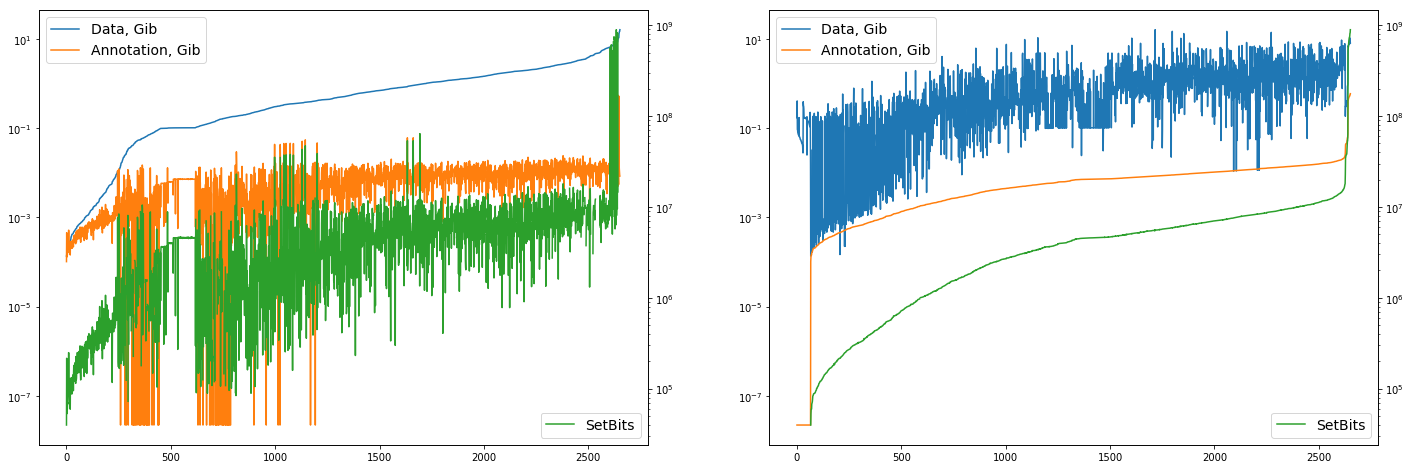

In [20]:
fig, axes = plt.subplots(1, 2, figsize=(24, 8))

stats.sort_values('ComprData', inplace=True)
ax = axes[0]
ax.plot(stats['ComprData'].values, label='Data, Gib')
ax.plot(stats['Annotation'].values, label='Annotation, Gib')
ax.legend(loc='upper left', fontsize=14)
ax.set_yscale('log')
right_ax = ax.twinx()
right_ax._get_lines.prop_cycler = ax._get_lines.prop_cycler
right_ax.plot(stats['SetBits'].values, label='SetBits')
right_ax.legend(loc='lower right', fontsize=14)
right_ax.set_yscale('log')

stats.sort_values('Annotation', inplace=True)
ax = axes[1]
ax.plot(stats['ComprData'].values, label='Data, Gib')
ax.plot(stats['Annotation'].values, label='Annotation, Gib')
ax.legend(loc='upper left', fontsize=14)
ax.set_yscale('log')
right_ax = ax.twinx()
right_ax._get_lines.prop_cycler = ax._get_lines.prop_cycler
right_ax.plot(stats['SetBits'].values, label='SetBits')
right_ax.legend(loc='lower right', fontsize=14)
right_ax.set_yscale('log')

plt.show()

In [21]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

plt.rc('font', family='serif')#, serif='Times')
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
plt.rc('axes', labelsize=12)
plt.rc('legend', fontsize=10)
#plt.rcParams['mathtext.fontset'] = 'stix'
#plt.rcParams['font.family'] = 'STIXGeneral'
params = {
#'text.usetex': True,
#'font.size': 15,
#'text.latex.unicode': True
}
plt.rcParams.update(params)

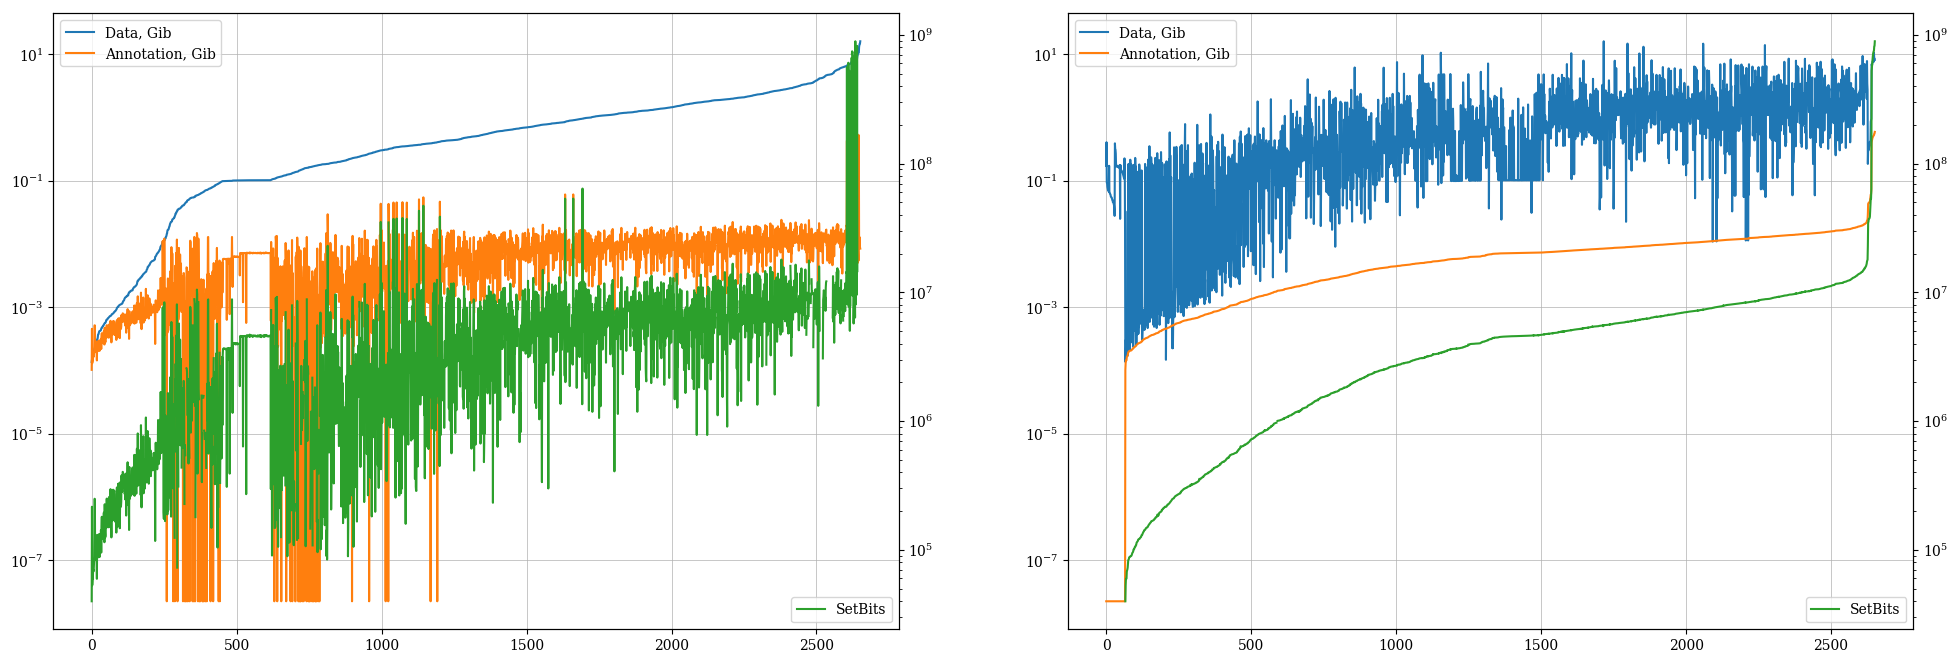

In [22]:
fig, axes = plt.subplots(1, 2, figsize=(24, 8))

stats.sort_values('ComprData', inplace=True)
ax = axes[0]
ax.plot(stats['ComprData'].values, label='Data, Gib')
ax.plot(stats['Annotation'].values, label='Annotation, Gib')
ax.legend(loc='upper left')
ax.set_yscale('log')
right_ax = ax.twinx()
right_ax._get_lines.prop_cycler = ax._get_lines.prop_cycler
right_ax.plot(stats['SetBits'].values, label='SetBits')
right_ax.legend(loc='lower right')
right_ax.set_yscale('log')
ax.grid(linewidth=0.5)
#ax.tick_params(reset=True, direction='in', which='both', bottom=True, top=True, left=True, right=True, width=0.5)
#right_ax.tick_params(reset=True, direction='in', which='both', bottom=True, top=True, left=True, right=True, width=0.5)
#lg = ax.legend(frameon=False, loc=(0.03, 0.05))
#lg.get_frame().set_linewidth(0.5)

stats.sort_values('Annotation', inplace=True)
ax = axes[1]
ax.plot(stats['ComprData'].values, label='Data, Gib')
ax.plot(stats['Annotation'].values, label='Annotation, Gib')
ax.legend(loc='upper left')
ax.set_yscale('log')
right_ax = ax.twinx()
right_ax._get_lines.prop_cycler = ax._get_lines.prop_cycler
right_ax.plot(stats['SetBits'].values, label='SetBits')
right_ax.legend(loc='lower right')
right_ax.set_yscale('log')
ax.grid(linewidth=0.5)

plt.show()

# Simulation

In [23]:
stats['Density'].values

array([     nan,      nan,      nan, ..., 0.122585, 0.123583, 0.134296])

In [24]:
stats.sort_values('Density', inplace=True)
stats = stats.loc[stats['Density'] >= 0]

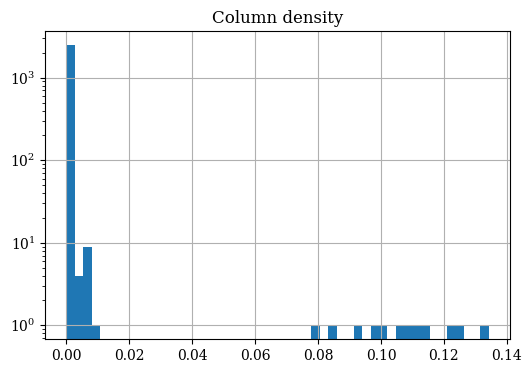

In [25]:
plt.subplots(1, 1, figsize=(6, 4))
plt.hist(stats['Density'], bins=50)
plt.title('Column density')
plt.yscale('log')
plt.grid()
plt.show()

In [26]:
num_rows = 10000

cols = np.random.random((num_rows, stats.shape[0])) <= stats['Density'].values

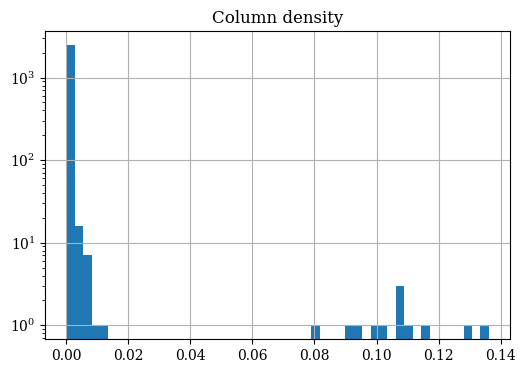

In [27]:
densities = cols.mean(0)

plt.subplots(1, 1, figsize=(6, 4))
plt.hist(densities, bins=50)
plt.title('Column density')
plt.yscale('log')
plt.grid()
plt.show()

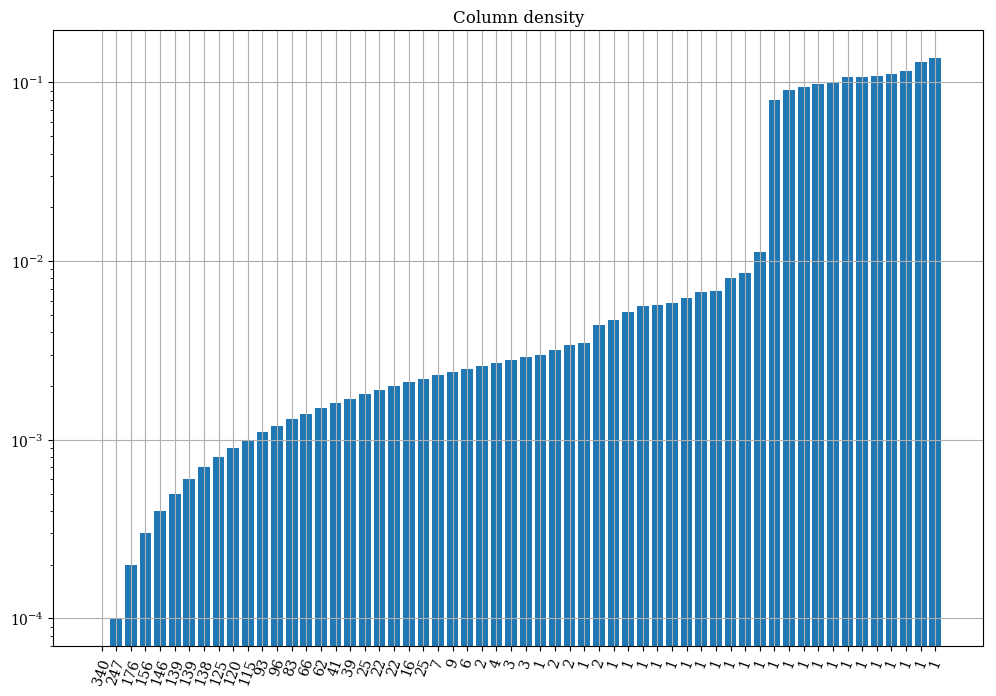

In [28]:
plt.subplots(1, 1, figsize=(12, 8))
unique_densities = np.unique(densities)
x = np.arange(len(unique_densities))
counts = [sum(densities == d) for d in unique_densities]
plt.bar(x, unique_densities)
plt.xticks(x, counts, rotation=70)
plt.title('Column density')
plt.yscale('log')
plt.grid()
plt.show()

In [29]:
cols.shape

(10000, 2496)

## Cost function

In [30]:
from itertools import groupby

def group_cost_(group_size, index_col):
    if group_size == 0:
        return 0
    elif group_size == 1:
        return 1
    else:
        return 1 + index_col.mean() * group_size

def group_cost(cols):
    return group_cost_(len(cols), np.sum(cols, 0) > 0)

def cost(cols, partition):
    d = {g: [] for g in partition}
    for c, g in zip(cols.T, partition):
        assert c.size == cols.shape[0]
        d[g].append(c)

    return sum([group_cost(cols) for cols in d.values()])

## No column index
$\{1,\dots,n\}\to\underbrace{\{1\}}_{G_1},\dots,\underbrace{\{n\}}_{G_n}$

In [31]:
grouping = np.arange(cols.shape[1])
grouping

array([   0,    1,    2, ..., 2493, 2494, 2495])

In [32]:
cost(cols, grouping)

2496

## Simple affine partitioning
$\{1,\dots,n\}\to\underbrace{\{1,\dots,s\}}_{G_1},\underbrace{\{s+1,\dots,2 s\}}_{G_2},\dots,\underbrace{\{(t-1)s+1,\dots,n\}}_{G_t}$

### Initial guess

In [33]:
grouping = np.arange(cols.shape[1]) // 28
grouping

array([ 0,  0,  0, ..., 89, 89, 89])

In [34]:
cost(cols, grouping)

155.16120000000004

### Exhaustive search

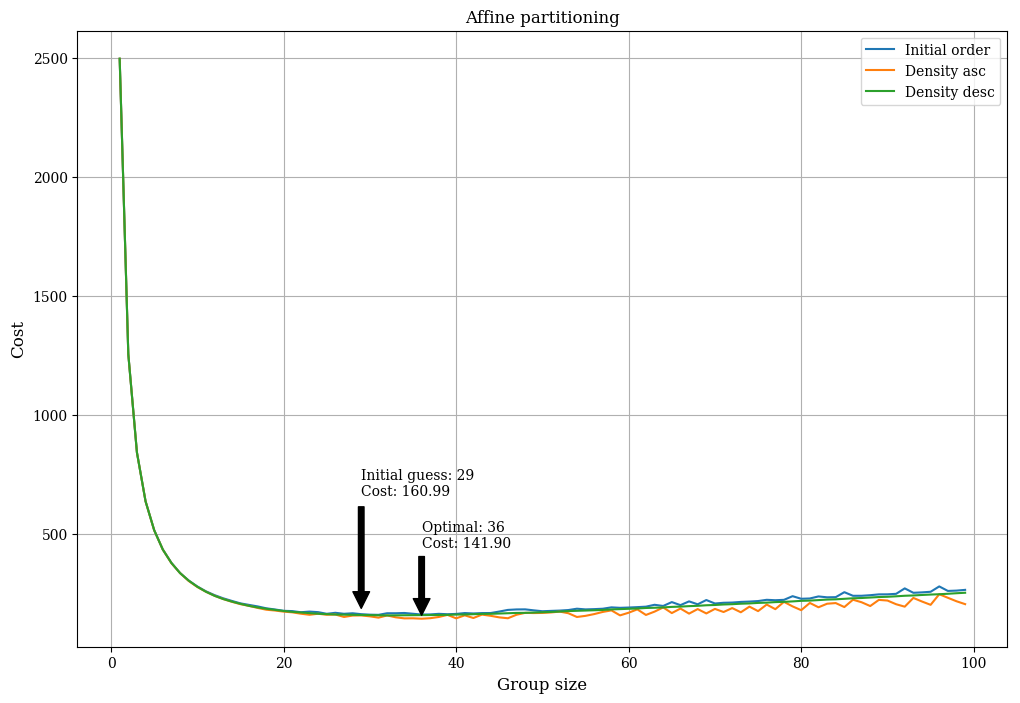

In [35]:
fig, axes = plt.subplots(1, 1, figsize=(12, 8))

group_size = np.arange(1, 100)

costs = []
for x in group_size:
    sorted_cols = cols[:, np.argsort(stats['Initial_order'].values)[::-1]]
    grouping = np.arange(sorted_cols.shape[1]) // x
    costs.append(cost(sorted_cols, grouping))
plt.plot(group_size, costs, label='Initial order')

xopt = group_size[28]
yopt = costs[28]
axes.annotate('Initial guess: {}\nCost: {:.2f}'.format(xopt, yopt), xy=(xopt, yopt), xytext=(xopt, yopt + 500), arrowprops=dict(facecolor='black', shrink=0.05))

costs = []
for x in group_size:
    sorted_cols = cols[:, np.argsort(stats['Density'].values)]
    grouping = np.arange(sorted_cols.shape[1]) // x
    costs.append(cost(sorted_cols, grouping))
plt.plot(group_size, costs, label='Density asc')

xopt = group_size[np.argmin(costs)]
yopt = costs[np.argmin(costs)]
axes.annotate('Optimal: {}\nCost: {:.2f}'.format(xopt, yopt), xy=(xopt, yopt), xytext=(xopt, yopt + 300), arrowprops=dict(facecolor='black', shrink=0.05))

costs = []
for x in group_size:
    sorted_cols = cols[:, np.argsort(stats['Density'].values)[::-1]]
    grouping = np.arange(sorted_cols.shape[1]) // x
    costs.append(cost(sorted_cols, grouping))
plt.plot(group_size, costs, label='Density desc')

plt.ylabel('Cost')
plt.xlabel('Group size')
plt.title('Affine partitioning')
plt.legend(loc='best')

plt.grid()
plt.show()

## Improve greedy

In [36]:
def greedy_improve(cols, initial_partition, num_iter=100):
    assignment = initial_partition
    num_clusters = np.unique(initial_partition).size

    index_cols = np.array([cols[:, assignment == t].sum(1) > 0 for t in range(num_clusters)]).T
    partition_sizes = [sum(assignment == t) for t in range(num_clusters)]

    total_cost = cost(cols, assignment)

    for iteration in range(num_iter):
        epoch_cost_delta = 0

        for i in np.random.choice(np.arange(cols.shape[1]), cols.shape[1], replace=False):
            old_cluster = assignment[i]

            cost_delta = -group_cost_(partition_sizes[old_cluster], index_cols[:, old_cluster])

            assignment[i] = -1
            partition_sizes[old_cluster] -= 1

            index_cols[:, old_cluster] = (cols[:, assignment == old_cluster].sum(1) > 0)

            updated_index = (index_cols + cols[:, i].reshape(-1, 1)) > 0

            cost_delta += group_cost_(partition_sizes[old_cluster], index_cols[:, old_cluster])

            cost_deltas = [cost_delta +
                               group_cost_(partition_sizes[t] + 1, updated_index[:, t]) -
                               group_cost_(partition_sizes[t], index_cols[:, t]) for t in range(index_cols.shape[1])]

            new_cluster = np.argmin(cost_deltas)

            cost_delta = cost_deltas[new_cluster]
            epoch_cost_delta += cost_delta
            total_cost += cost_delta

            assignment[i] = new_cluster
            partition_sizes[new_cluster] += 1

            index_cols[:, new_cluster] = updated_index[:, new_cluster]

            print("{}\t{}\t\t{:.5f}\t\t{:.5f}".format(i, new_cluster, cost_delta, total_cost), end='\n')

        if abs(epoch_cost_delta / total_cost) < 0.01:
            break

    return assignment

In [37]:
sorted_cols = cols[:, np.argsort(stats['Density'].values)]
partition = np.arange(sorted_cols.shape[1]) // 36

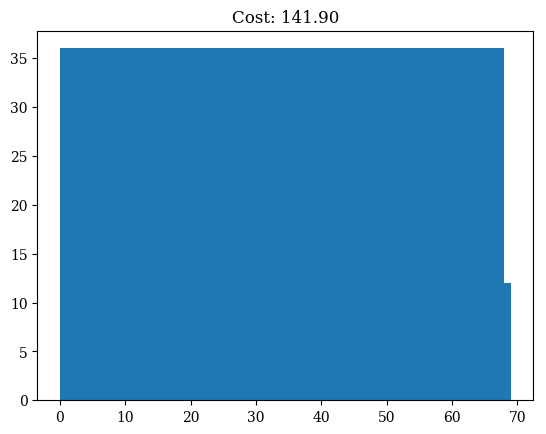

In [38]:
plt.hist(partition, bins=len(np.unique(partition)))
plt.title('Cost: {:.2f}'.format(cost(sorted_cols, partition)))
plt.show()

In [39]:
improved_partition = greedy_improve(sorted_cols, partition)

535	3		-0.00440		141.89840
1752	1		-0.02930		141.86910
1031	2		-0.01640		141.85270
94	3		-0.00070		141.85200
2257	0		-0.04160		141.81040
2072	14		-0.03780		141.77260
1143	12		-0.01920		141.75340
1953	10		-0.04230		141.71110
315	3		-0.00050		141.71060
1204	8		-0.01950		141.69110
2172	13		-0.04530		141.64580
1867	2		-0.02920		141.61660
1643	6		-0.02640		141.59020
2407	5		-0.05920		141.53100
2426	4		-0.04870		141.48230
1804	8		-0.03560		141.44670
345	3		-0.00100		141.44570
1950	9		-0.03800		141.40770
702	10		-0.00800		141.39970
460	3		-0.00420		141.39550
166	3		-0.00310		141.39240
786	1		-0.00860		141.38380
145	3		-0.00230		141.38150
1253	11		-0.02390		141.35760
1705	7		-0.02590		141.33170
516	3		-0.00560		141.32610
257	3		-0.00220		141.32390
245	3		-0.00110		141.32280
2105	4		-0.03800		141.28480
714	6		-0.00610		141.27870
1351	5		-0.02290		141.25580
343	3		-0.00130		141.25450
389	10		0.00000		141.25450
619	1		-0.00520		141.24930
2289	0		-0.05500		141.19430
1251	9		-0.01860		141.17570
229

415	3		-0.00660		136.76780
2120	18		-0.01520		136.75260
526	5		-0.00620		136.74640
2369	35		-0.02980		136.71660
461	10		-0.00180		136.71480
2211	12		-0.03340		136.68140
2255	22		-0.02940		136.65200
2000	2		-0.01850		136.63350
1658	15		-0.01710		136.61640
1489	29		-0.00800		136.60840
584	6		-0.00210		136.60630
977	8		-0.00510		136.60120
2259	19		-0.02070		136.58050
556	3		-0.01000		136.57050
1991	31		-0.01060		136.55990
771	1		-0.00510		136.55480
2061	19		-0.01260		136.54220
2277	39		-0.02720		136.51500
1279	26		-0.00760		136.50740
2192	26		-0.01960		136.48780
1797	14		-0.01350		136.47430
835	9		-0.00250		136.47180
9	3		-0.00830		136.46350
1232	0		-0.00780		136.45570
1152	17		-0.00890		136.44680
193	3		-0.00770		136.43910
1166	21		-0.00490		136.43420
1081	14		-0.00310		136.43110
1318	7		-0.01000		136.42110
2236	23		-0.01550		136.40560
1607	9		-0.00720		136.39840
2002	27		-0.00620		136.39220
1859	41		-0.01380		136.37840
1060	1		-0.01270		136.36570
952	11		-0.00240		136.36330
1915	34		-0.

2136	11		-0.01550		133.94350
1363	4		-0.00700		133.93650
1163	21		-0.00220		133.93430
1268	35		0.00000		133.93430
1809	28		-0.00750		133.92680
428	3		-0.00960		133.91720
362	3		-0.00890		133.90830
848	13		-0.00370		133.90460
906	13		-0.00480		133.89980
1469	4		-0.00840		133.89140
1443	11		-0.01140		133.88000
1883	5		-0.00980		133.87020
1782	49		0.00000		133.87020
674	3		-0.01660		133.85360
696	13		-0.00440		133.84920
2008	32		-0.00010		133.84910
1769	23		-0.00390		133.84520
1876	17		-0.00740		133.83780
1562	53		-0.00610		133.83170
828	1		-0.00680		133.82490
1755	43		-0.00110		133.82380
2361	52		-0.03210		133.79170
2302	48		-0.00990		133.78180
2089	41		-0.01310		133.76870
2244	52		-0.01830		133.75040
634	1		-0.00400		133.74640
2029	31		-0.01200		133.73440
2245	42		-0.01990		133.71450
1282	25		-0.00370		133.71080
1295	35		0.00000		133.71080
1560	37		-0.00640		133.70440
749	8		-0.00300		133.70140
705	2		-0.00450		133.69690
873	12		-0.00600		133.69090
1897	53		-0.00670		133.68420
2206	46		

1822	40		-0.00840		131.98350
521	6		-0.00450		131.97900
2341	29		-0.02070		131.95830
50	3		-0.00650		131.95180
885	24		0.00000		131.95180
1122	24		-0.00810		131.94370
1648	28		-0.00330		131.94040
268	1		-0.00180		131.93860
890	24		0.00000		131.93860
2174	63		-0.00270		131.93590
1182	31		-0.00680		131.92910
45	3		-0.00660		131.92250
2288	49		-0.00430		131.91820
212	1		-0.00150		131.91670
1032	5		-0.00790		131.90880
1398	23		-0.00500		131.90380
1179	38		-0.00260		131.90120
909	6		-0.00470		131.89650
116	3		0.00000		131.89650
1513	14		-0.00050		131.89600
1715	39		-0.00580		131.89020
1373	45		-0.00640		131.88380
893	26		-0.00070		131.88310
1188	25		-0.00480		131.87830
278	6		-0.00130		131.87700
1865	55		-0.00400		131.87300
465	3		-0.01330		131.85970
2325	30		-0.00550		131.85420
1603	42		-0.00080		131.85340
122	3		0.00000		131.85340
143	1		-0.00180		131.85160
260	7		0.00000		131.85160
1824	48		-0.00590		131.84570
392	10		0.00000		131.84570
1147	0		-0.00460		131.84110
1185	32		0.00000		131.8

97	2		0.00000		130.23790
2038	19		-0.00560		130.23230
686	3		-0.01910		130.21320
1258	43		-0.00320		130.21000
648	3		-0.01910		130.19090
1672	50		-0.00460		130.18630
492	3		-0.01510		130.17120
861	12		-0.00610		130.16510
264	3		-0.01330		130.15180
1421	46		-0.00390		130.14790
1192	20		-0.00480		130.14310
1692	47		0.00000		130.14310
1791	48		-0.00420		130.13890
1725	46		-0.00160		130.13730
2123	62		-0.00450		130.13280
1120	47		-0.00240		130.13040
2034	34		-0.00540		130.12500
103	3		-0.01130		130.11370
2205	34		-0.00720		130.10650
1514	56		-0.00280		130.10370
1133	31		0.00000		130.10370
972	27		0.00000		130.10370
1606	26		-0.00210		130.10160
809	1		-0.00790		130.09370
1620	19		-0.00280		130.09090
1289	31		-0.00370		130.08720
2448	62		-0.03580		130.05140
1085	30		0.00000		130.05140
1290	35		0.00000		130.05140
605	6		-0.00020		130.05120
263	8		-0.00120		130.05000
2066	54		-0.00310		130.04690
98	2		0.00000		130.04690
58	3		-0.00760		130.03930
217	6		0.00000		130.03930
2152	31		-0.00200		130

1519	37		-0.00270		128.96430
2044	56		0.00000		128.96430
2389	56		-0.00410		128.96020
2054	57		0.00000		128.96020
2006	36		-0.00320		128.95700
1649	46		-0.00010		128.95690
1486	27		-0.00430		128.95260
784	9		-0.00440		128.94820
2051	47		-0.00330		128.94490
2345	39		-0.00500		128.93990
1200	15		-0.00370		128.93620
520	13		-0.00260		128.93360
1248	34		0.00000		128.93360
756	11		-0.01060		128.92300
1079	42		-0.00050		128.92250
971	12		-0.00090		128.92160
442	7		-0.00370		128.91790
2443	66		-0.00580		128.91210
2398	65		-0.00460		128.90750
1386	9		-0.00620		128.90130
603	6		-0.00130		128.90000
929	20		-0.00100		128.89900
816	10		-0.00620		128.89280
1993	29		-0.00090		128.89190
618	8		-0.00140		128.89050
810	6		-0.00900		128.88150
155	4		0.00000		128.88150
1355	0		-0.00710		128.87440
1418	55		-0.00280		128.87160
550	12		-0.00130		128.87030
2052	40		-0.00370		128.86660
438	1		-0.00130		128.86530
553	15		0.00000		128.86530
1642	45		0.00000		128.86530
1128	44		-0.00600		128.85930
1682	48		-0.00

1125	31		0.00000		127.95170
341	3		-0.01720		127.93450
252	3		-0.01540		127.91910
1722	9		-0.00210		127.91700
152	5		-0.00500		127.91200
2093	54		-0.00590		127.90610
2437	67		0.00000		127.90610
988	4		-0.00130		127.90480
396	1		-0.00040		127.90440
620	16		0.00000		127.90440
1353	37		0.00000		127.90440
1221	33		0.00000		127.90440
1227	45		-0.00420		127.90020
2418	67		0.00000		127.90020
170	3		-0.01590		127.88430
959	32		-0.00460		127.87970
961	24		-0.00380		127.87590
2116	4		-0.00450		127.87140
2026	39		-0.00090		127.87050
768	17		-0.00120		127.86930
2256	58		-0.00500		127.86430
1600	44		0.00000		127.86430
2314	64		0.00000		127.86430
907	20		-0.00270		127.86160
698	14		-0.00260		127.85900
1899	56		-0.00400		127.85500
932	19		-0.00050		127.85450
74	3		-0.01290		127.84160
644	17		0.00000		127.84160
67	3		-0.00890		127.83270
2017	56		0.00000		127.83270
131	3		0.00000		127.83270
2430	66		-0.00050		127.83220
410	3		-0.01330		127.81890
2449	67		-0.00660		127.81230
2386	36		-0.00560		127.80670

2316	61		-0.00080		126.94740
291	3		-0.01310		126.93430
1889	32		-0.00020		126.93410
738	20		0.00000		126.93410
1392	38		0.00000		126.93410
542	2		-0.00630		126.92780
2394	46		-0.00330		126.92450
454	19		-0.00290		126.92160
1728	41		-0.00850		126.91310
5	3		-0.01670		126.89640
2304	56		-0.00140		126.89500
119	3		0.00000		126.89500
803	8		-0.00540		126.88960
878	24		0.00000		126.88960
532	3		-0.01830		126.87130
2024	22		-0.00230		126.86900
853	8		-0.00440		126.86460
2134	64		-0.00120		126.86340
1554	43		0.00000		126.86340
364	10		0.00000		126.86340
2348	59		-0.00620		126.85720
1342	37		0.00000		126.85720
2166	64		-0.00060		126.85660
1973	54		0.00000		126.85660
439	3		-0.01430		126.84230
1796	49		0.00000		126.84230
2100	45		-0.00430		126.83800
1119	41		-0.00290		126.83510
195	3		-0.01490		126.82020
1025	28		0.00000		126.82020
1215	33		0.00000		126.82020
1321	0		-0.00330		126.81690
585	16		0.00000		126.81690
205	3		-0.01490		126.80200
901	25		0.00000		126.80200
2138	59		0.00000		126.80200

1109	30		0.00000		125.91340
689	5		-0.00870		125.90470
308	3		-0.01380		125.89090
2025	62		-0.00350		125.88740
1550	37		-0.00330		125.88410
1808	50		0.00000		125.88410
367	15		-0.00210		125.88200
2352	64		-0.00130		125.88070
1242	34		0.00000		125.88070
562	16		-0.00610		125.87460
1583	43		0.00000		125.87460
1459	21		-0.00260		125.87200
2043	67		-0.00020		125.87180
2474	68		0.00000		125.87180
1719	47		0.00000		125.87180
2084	56		-0.00170		125.87010
2113	34		-0.00280		125.86730
920	27		-0.00130		125.86600
659	21		-0.00260		125.86340
815	25		-0.00300		125.86040
1525	51		-0.00210		125.85830
87	3		-0.01390		125.84440
1354	41		-0.00280		125.84160
2237	62		0.00000		125.84160
194	3		-0.01590		125.82570
616	24		-0.00160		125.82410
1698	45		-0.00120		125.82290
153	3		-0.01740		125.80550
782	2		-0.00390		125.80160
373	11		-0.00060		125.80100
293	3		-0.01380		125.78720
2285	63		0.00000		125.78720
1210	39		-0.00460		125.78260
830	18		-0.00250		125.78010
1751	33		-0.00340		125.77670
1260	50		-0.0002

872	51		-0.00750		125.16620
106	3		0.00000		125.16620
1713	43		-0.00010		125.16610
1573	21		0.00000		125.16610
1519	37		0.00000		125.16610
1280	51		0.00000		125.16610
2091	34		-0.01650		125.14960
722	5		0.00000		125.14960
245	3		0.00000		125.14960
116	3		0.00000		125.14960
60	0		0.00000		125.14960
2224	65		-0.00620		125.14340
2338	15		0.00000		125.14340
57	3		0.00000		125.14340
942	20		-0.00020		125.14320
397	3		0.00000		125.14320
1305	19		0.00000		125.14320
2398	35		-0.00200		125.14120
162	3		0.00000		125.14120
2465	55		-0.01950		125.12170
2443	66		0.00000		125.12170
2178	62		-0.00350		125.11820
398	24		-0.00140		125.11680
265	7		0.00000		125.11680
178	3		0.00000		125.11680
783	24		-0.00120		125.11560
2119	38		-0.00130		125.11430
1392	38		0.00000		125.11430
1006	24		-0.00240		125.11190
1129	31		0.00000		125.11190
1753	48		0.00000		125.11190
1054	29		0.00000		125.11190
1658	15		0.00000		125.11190
319	8		0.00000		125.11190
1163	21		0.00000		125.11190
2197	5		0.00000		125.11190
1064	51		

1106	1		-0.00020		124.74490
1024	17		-0.00170		124.74320
417	1		-0.01740		124.72580
858	4		0.00000		124.72580
27	3		0.00000		124.72580
1059	16		-0.00320		124.72260
1593	44		0.00000		124.72260
134	3		0.00000		124.72260
1555	43		0.00000		124.72260
1874	21		-0.00480		124.71780
1082	0		0.00000		124.71780
562	16		0.00000		124.71780
963	2		-0.00090		124.71690
657	25		0.00000		124.71690
684	47		-0.00120		124.71570
1230	21		0.00000		124.71570
774	21		0.00000		124.71570
351	1		0.00000		124.71570
1050	0		0.00000		124.71570
1173	19		-0.00230		124.71340
2051	34		-0.00020		124.71320
1501	7		-0.00040		124.71280
1284	27		0.00000		124.71280
608	16		0.00000		124.71280
1842	25		0.00000		124.71280
2472	67		-0.00040		124.71240
2381	58		-0.00070		124.71170
1246	43		-0.00080		124.71090
1415	39		0.00000		124.71090
1984	36		-0.00240		124.70850
1334	39		0.00000		124.70850
624	2		-0.00020		124.70830
1359	11		0.00000		124.70830
2206	46		0.00000		124.70830
648	3		0.00000		124.70830
2371	26		-0.00130		124.70700
95

2336	64		0.00000		124.46090
2095	62		0.00000		124.46090
1344	37		0.00000		124.46090
1124	6		-0.00130		124.45960
2392	28		0.00000		124.45960
1684	46		-0.00170		124.45790
1733	22		0.00000		124.45790
1403	4		0.00000		124.45790
1559	21		0.00000		124.45790
24	3		0.00000		124.45790
947	23		-0.00060		124.45730
1069	4		-0.00710		124.45020
1406	8		0.00000		124.45020
1194	33		0.00000		124.45020
1077	20		0.00000		124.45020
1434	16		0.00000		124.45020
1154	33		-0.00130		124.44890
2421	28		-0.00030		124.44860
1938	63		0.00000		124.44860
692	5		-0.00240		124.44620
1500	16		0.00000		124.44620
1297	46		0.00000		124.44620
1777	49		0.00000		124.44620
1923	35		0.00000		124.44620
435	11		-0.00130		124.44490
1428	37		0.00000		124.44490
2127	43		0.00000		124.44490
1512	16		0.00000		124.44490
1942	23		0.00000		124.44490
2144	63		-0.00210		124.44280
1073	20		0.00000		124.44280
1870	50		0.00000		124.44280
1314	11		0.00000		124.44280
817	7		0.00000		124.44280
1533	9		-0.00840		124.43440
126	3		0.00000		124.4344

limit_output extension: Maximum message size of 100000 exceeded with 100333 characters

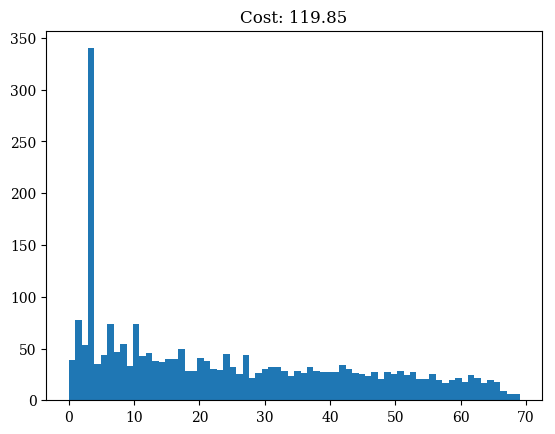

In [40]:
plt.hist(improved_partition, bins=len(np.unique(improved_partition)))
plt.title('Cost: {:.2f}'.format(cost(sorted_cols, improved_partition)))
plt.show()

In [41]:
def sa_improve(cols, initial_partition, num_iter=100, k=1):
    assignment = initial_partition.copy()
    num_clusters = np.unique(initial_partition).size

    index_cols = np.array([cols[:, assignment == t].sum(1) > 0 for t in range(num_clusters)]).T
    partition_sizes = [sum(assignment == t) for t in range(num_clusters)]

    total_cost = cost(cols, assignment)

    for iteration in range(num_iter):
        i = np.random.randint(0, cols.shape[1])

        old_cluster = assignment[i]
        new_cluster = np.random.randint(0, num_clusters)

        if old_cluster == new_cluster:
            continue

        assignment[i] = -1

        cost_delta = (group_cost_(partition_sizes[new_cluster] + 1, index_cols[:, new_cluster] + cols[:, i] > 0)
                        - group_cost_(partition_sizes[new_cluster], index_cols[:, new_cluster])
                        + group_cost_(partition_sizes[old_cluster] - 1, cols[:, assignment == old_cluster].sum(1) > 0)
                        - group_cost_(partition_sizes[old_cluster], index_cols[:, old_cluster]))

        T = (num_iter - iteration) / num_iter
        if iteration % 100 == 0:
            print(cost_delta, np.exp(-cost_delta / (k * T)))
        if np.exp(-cost_delta / (k * T)) < np.random.random():
            assignment[i] = old_cluster
            continue

        assignment[i] = new_cluster

        partition_sizes[new_cluster] += 1
        partition_sizes[old_cluster] -= 1

        index_cols[:, old_cluster] = cols[:, assignment == old_cluster].sum(1) > 0
        index_cols[:, new_cluster] = index_cols[:, new_cluster] + cols[:, i] > 0

        total_cost += cost_delta

        if iteration % 100 == 0:
            print("{}\t{}\t{}->{}\t\t{:.5f}\t\t{:.5f}".format(iteration, i, old_cluster, new_cluster, cost_delta, total_cost), end='\n')

    return assignment

In [42]:
improved_partition = sa_improve(sorted_cols, improved_partition, num_iter=int(5e4), k=5e-3)

0.030999999999999694 0.0020294306362958585
0.030199999999999783 0.0023529057896958115
0.008299999999999974 0.18887560283756283
0.02540000000000009 0.006032076391981932
0.006500000000000172 0.2696895298744196
0.0242 0.00752978425565003
0.007699999999999818 0.21040848869134446
600	1715	39->16		0.00770		120.32770
0.01849999999999974 0.023458192213891248
0.018899999999999917 0.021462170298277655
0.4699000000000009 2.7344388684854895e-42
0.0036000000000000476 0.47965226883003964
0.013299999999999645 0.06588553236395348
0.00869999999999993 0.1681688263795668
0.006600000000000161 0.257886390064298
0.031199999999999894 0.00162905842178091
0.45749999999999913 1.0790617413517688e-41
0.023600000000000065 0.007627210797548355
0.022700000000000164 0.009097160376790075
-0.0006999999999999229 1.156303426832917
1800	1167	63->27		-0.00070		121.16640
0.01849999999999996 0.021361739175007232
0.032399999999999984 0.0011708796207911775
0.012499999999999956 0.07356371773938242
-0.0030000000000001137 1.87313

0.005300000000000082 0.20554515183142674
0.0032000000000003137 0.38362727632502985
0.007099999999999884 0.11858418696424505
0.01159999999999961 0.03037984440011963
-0.0036999999999998145 3.058194696541216
16900	2301	34->58		-0.00370		125.71900
0.01849999999999996 0.0036755201972570924
-0.000400000000000178 1.1292803225311636
17100	1512	43->30		-0.00040		125.73620
0.04859999999999998 3.673050369623502e-07
0.031500000000000083 6.552836058946446e-05
0.000500000000000167 0.8578086413238356
17400	1187	16->41		0.00050		125.74330
0.008400000000000185 0.0754250836706259
0.006800000000000139 0.12260770238847983
0.00030000000000041105 0.91130352720622
17700	1611	31->23		0.00030		125.74560
0.007500000000000062 0.09737434059892382
-0.0019000000000000128 1.8074198147084937
17900	1497	66->54		-0.00190		125.74940
0.008499999999999952 0.0702110200149891
-0.0004999999999999449 1.1696912345790622
18100	757	44->17		-0.00050		125.77530
0.009600000000000053 0.04885649630780838
0.02210000000000001 0.0009381

0.005399999999999849 0.04569738125334132
32500	2006	57->58		0.00540		125.41150
-0.009300000000000308 209.5217570436832
32600	811	49->27		-0.00930		125.39720
-0.000600000000000156 1.4145632260114287
32700	1933	0->56		-0.00060		125.39760
-0.0005999999999999339 1.417418429024586
32800	1129	7->19		-0.00060		125.38770
-0.005400000000000071 23.521025819221446
32900	2182	49->54		-0.00540		125.36690
0.0037999999999998035 0.10696066620687426
0.0049000000000001265 0.055055787809259286
0.0019000000000000128 0.32272575215569443
0.007400000000000073 0.011900941973613317
0.016399999999999748 5.121295286401408e-05
0.006599999999999939 0.018315638888734862
-0.0018000000000000238 2.996847718132868
33600	1769	22->37		-0.00180		125.31170
0.009000000000000119 0.003999954101159887
0.01200000000000001 0.000606741691192144
-0.0012999999999998568 2.242190783257685
33900	1096	16->29		-0.00130		125.25340
0.0016000000000000458 0.3678794411714318
0.0052000000000000934 0.03798969836858359
-0.0004999999999999449 1.

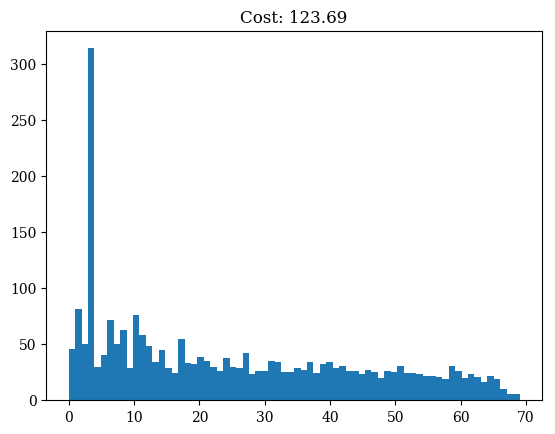

In [43]:
plt.hist(improved_partition, bins=len(np.unique(improved_partition)))
plt.title('Cost: {:.2f}'.format(cost(sorted_cols, improved_partition)))
plt.show()

In [44]:
sorted_cols = cols[:, np.argsort(stats['Density'].values)]
partition = np.arange(sorted_cols.shape[1]) // 36

In [45]:
improved_partition = sa_improve(sorted_cols, partition, num_iter=int(1e5), k=1e-3)

-0.01589999999999936 8040485.299753367
0	1748	48->22		-0.01590		141.88690
0.08789999999999942 6.127768404840806e-39
-0.01710000000000056 27626017.15112862
200	2139	59->35		-0.01710		140.01670
0.011400000000000077 1.0817959278839716e-05
-0.010000000000000231 22929.06600487915
400	1814	50->33		-0.01000		138.46910
-0.0014000000000000679 4.083829601011581
500	98	2->12		-0.00140		138.05800
-0.00010000000000021103 1.1058382246379286
600	1977	54->6		-0.00010		137.68030
-0.014900000000000357 3285519.1920000366
700	2067	57->11		-0.01490		137.41850
0.00990000000000002 4.6324540278327535e-05
0.009799999999999809 5.0729599097822744e-05
0.03059999999999996 3.770095726664562e-14
-0.0034000000000000696 31.11891942104288
1100	974	27->5		-0.00340		136.46600
0.012199999999999989 4.337648670531599e-06
0.008200000000000207 0.00024653562473185147
0.05499999999999927 5.95180337559931e-25
0.0017999999999998018 0.1608293896452114
0.022999999999999687 7.060051055226047e-11
0.01849999999999996 6.708174615707617

0.014499999999999735 2.642760315330743e-08
0.0011999999999998678 0.23556152840676325
0.0033000000000000806 0.018672570724370178
0.010399999999999965 3.508273669840049e-06
-0.0010999999999998789 3.781454889892471
17300	404	11->7		-0.00110		130.00570
0.010099999999999998 4.893499307626236e-06
0.019500000000000073 5.430723609963779e-11
0.026499999999999968 1.0789594744742428e-14
0.012299999999999978 3.230941750139115e-07
0.024599999999999733 1.0066207304285168e-13
0.025499999999999856 3.24302971107112e-14
0.007700000000000262 8.353507934284941e-05
0.021600000000000286 3.516248809678881e-12
0.025500000000000078 2.893877128224349e-14
0.012800000000000145 1.5699142304094113e-07
0.0022999999999999687 0.05968781095840981
0.0028000000000001357 0.03220663402322747
0.01200000000000001 3.959354112040476e-07
0.006099999999999994 0.0005513862309553429
0.009499999999999842 8.297905792438226e-06
0.011900000000000022 4.241227537781628e-07
0.010999999999999899 1.265242298790966e-06
0.008399999999999963 

0.0121 8.714459245671621e-09
0.024899999999999922 2.4475772423830906e-17
0.013800000000000257 6.019966527990674e-10
0.0039000000000000146 0.002455941735532913
0.014100000000000001 3.54873666338306e-10
0.0012000000000000899 0.1564976844567142
0.005699999999999816 0.00014722781458158664
0.013300000000000312 1.1086142347178995e-09
0.0005999999999999339 0.39389259095714835
35600	1565	20->29		0.00060		128.02550
0.01859999999999995 2.736558411566143e-13
0.00869999999999993 1.302269730750629e-06
0.0021999999999999797 0.032317794553210336
0.007699999999999818 5.955174812527513e-06
0.0026999999999999247 0.014620185850395626
0.010000000000000231 1.5591089306049754e-07
0.06479999999999997 5.638041378617818e-45
0.006099999999999994 6.730343970443008e-05
0.019500000000000073 4.388965324457664e-14
0.04459999999999997 2.5143190761800066e-31
0.023399999999999643 8.319732685772957e-17
0.006699999999999928 2.4469905044240248e-05
0.01859999999999995 1.50651145776688e-13
0.008299999999999974 1.82020666785

0.009200000000000097 1.973271553119156e-09
0.0017000000000000348 0.024433738093042313
0.08330000000000015 6.897067213915156e-80
0.0024999999999997247 0.004159101804711838
0.009200000000000097 1.654478109102002e-09
0.007799999999999807 3.455834644457386e-08
0.009600000000000053 6.257607664242954e-10
0.011199999999999877 1.732689734568186e-11
0.01429999999999998 1.6970207756392615e-14
0.010800000000000143 3.775134544277904e-11
0.0017999999999998018 0.01815319526752452
0.01370000000000049 5.237446964349169e-14
0.005400000000000071 5.66877840238573e-06
0.015700000000000047 5.152941753833965e-16
0.0050000000000001155 1.3191273358836572e-05
0.018100000000000005 1.9753901203285902e-18
0.006699999999999928 2.7018646670970567e-07
0.005799999999999805 2.00038290005526e-06
0.019200000000000328 1.2357793218467142e-19
0.16569999999999974 2.8096113386029185e-164
0.005899999999999794 1.4562651222523096e-06
0.005800000000000249 1.774469358977908e-06
0.011500000000000288 3.725613894865885e-12
0.0020000

0.03390000000000004 1.708599960429044e-56
0.005600000000000049 5.658027111286585e-10
0.028000000000000247 3.8623289756149924e-47
0.018400000000000194 2.41585579701903e-31
0.017200000000000104 1.861014079115018e-29
0.007500000000000062 2.654024723408053e-13
0.0030000000000001137 8.913826238375379e-06
0.0041999999999999815 7.990619511186883e-08
0.010000000000000009 1.0848552640428993e-17
0.00749999999999984 1.685127962472205e-13
0.010199999999999987 3.6293419793272736e-18
0.01880000000000015 5.3495244737482225e-33
0.008099999999999996 1.0978285233287566e-14
0.013599999999999834 2.941075408250811e-24
0.009000000000000119 2.319522830242465e-16
0.012399999999999967 2.357673337304437e-22
0.007899999999999574 1.464263802456278e-14
0.012799999999999923 3.1192568697696306e-23
0.033299999999999885 1.626884486898509e-59
0.008300000000000196 1.9371646327748566e-15
-9.999999999998899e-05 1.5065707860501287
75600	194	7->8		-0.00010		124.84370
0.02770000000000028 3.1189147425216486e-50
0.004999999999

0.0020999999999999908 1.4278094550715443e-13
0.012699999999999934 1.6090612235325695e-79
0.01670000000000016 7.729424039994641e-106
-0.0023999999999999577 2128337699254202.0
93200	393	4->8		-0.00240		123.59820
0.010200000000000209 7.647625904932138e-67
0.008499999999999952 1.1698627330981084e-56
0.007600000000000051 1.6632322032848996e-51
0.0046999999999999265 1.2779062236157393e-32
0.0027999999999999137 4.98910939280186e-20
0.01609999999999978 1.6731300498326388e-113
0.01540000000000008 2.282665492759439e-110
0.12950000000000017 0.0
0.007300000000000084 1.8418701887436154e-54
0.07289999999999996 0.0
0.016899999999999915 1.7198703774846425e-129
0.005900000000000016 1.7537764259643904e-46
0.010000000000000231 1.0898504972454892e-79
0.0132000000000001 6.904411160185807e-107
0.00770000000000004 8.023920025463455e-64
0.011199999999999877 2.8817085270984585e-94
0.0032000000000000917 5.625357854337496e-28
0.024399999999999755 1.1595589470336688e-212
0.03300000000000014 3.280659575102653e-293

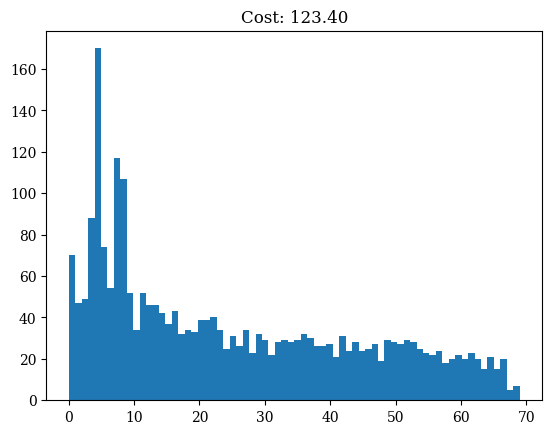

In [46]:
plt.hist(improved_partition, bins=len(np.unique(improved_partition)))
plt.title('Cost: {:.2f}'.format(cost(sorted_cols, improved_partition)))
plt.show()

## Clustering

### Agglomerative clustering

In [ ]:
import sklearn.cluster

clustering = sklearn.cluster.AgglomerativeClustering(60, affinity='cosine', linkage='average')
clustering.fit(cols.astype(float).T)

In [53]:
plt.hist(assignment, bins=len(np.unique(assignment)))
plt.title('Cost: {:.2f}'.format(cost(cols, assignment)))
plt.show()

NameError: name 'assignment' is not defined

def find_clusters(input):
    clusters = {}

    array = [n for n in range(input.shape[0])]

    clusters[0] = array.copy()

    for k in range(1, input.shape[0]):
        min_val = sys.maxsize

        for i in range(0, input.shape[0]):
            for j in range(0, input.shape[1]):
                if(input[i][j] <= min_val):
                    min_val = input[i][j]
                    row_index = i
                    col_index = j

        for i in range(0, input.shape[0]):
            if(i != col_index and i != row_index):
                dist_centroid = cal_dist_from_centroid(i, row_index, col_index)
                input[col_index][i] = dist_centroid
                input[i][col_index] = dist_centroid

        #set the rows and columns for the cluster with higher index i.e. the row index to infinity
        for i in range (0, input.shape[0]):
            input[row_index][i] = sys.maxsize
            input[i][row_index] = sys.maxsize

        #Manipulating the dictionary to keep track of cluster formation in each step
        #if k=0,then all datapoints are clusters

        minimum = min(row_index, col_index)
        maximum = max(row_index, col_index)

        for n in range(len(array)):
            if(array[n]==maximum):
                array[n] = minimum
        clusters[k] = array.copy()

    return clusters

import sys
import math
import os
import heapq
import itertools

class Hierarchical_Clustering:
    def __init__(self, ipt_data, ipt_k):
        self.input_file_name = ipt_data
        self.k = ipt_k
        self.dataset = None
        self.dataset_size = 0
        self.dimension = 0
        self.heap = []
        self.clusters = []
        self.gold_standard = {}

    def initialize(self):
        """
        Initialize and check parameters
        """
        # check file exist and if it's a file or dir
        if not os.path.isfile(self.input_file_name):
            self.quit("Input file doesn't exist or it's not a file")

        self.dataset, self.clusters, self.gold_standard = self.load_data(self.input_file_name)
        self.dataset_size = len(self.dataset)

        if self.dataset_size == 0:
            self.quit("Input file doesn't include any data")

        if self.k == 0:
            self.quit("k = 0, no cluster will be generated")

        if self.k > self.dataset_size:
            self.quit("k is larger than the number of existing clusters")

        self.dimension = len(self.dataset[0]["data"])

        if self.dimension == 0:
            self.quit("dimension for dataset cannot be zero")

    """"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
    """                      Hierarchical Clustering Functions                       """
    """                                                                              """    
    """"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""

    def euclidean_distance(self, data_point_one, data_point_two):
        """
        euclidean distance: https://en.wikipedia.org/wiki/Euclidean_distance
        assume that two data points have same dimension
        """
        size = len(data_point_one)
        result = 0.0
        for i in range(size):
            f1 = float(data_point_one[i])   # feature for data one
            f2 = float(data_point_two[i])   # feature for data two
            tmp = f1 - f2
            result += pow(tmp, 2)
        result = math.sqrt(result)
        return result

    def compute_pairwise_distance(self, dataset):
        result = []
        dataset_size = len(dataset)
        for i in range(dataset_size-1):    # ignore last i
            for j in range(i+1, dataset_size):     # ignore duplication
                dist = self.euclidean_distance(dataset[i]["data"], dataset[j]["data"])

                # duplicate dist, need to be remove, and there is no difference to use tuple only
                # leave second dist here is to take up a position for tie selection
                result.append( (dist, [dist, [[i], [j]]]) )

        return result
                
    def build_priority_queue(self, distance_list):
        heapq.heapify(distance_list)
        self.heap = distance_list
        return self.heap

    def compute_centroid_two_clusters(self, current_clusters, data_points_index):
        size = len(data_points_index)
        dim = self.dimension
        centroid = [0.0]*dim
        for index in data_points_index:
            dim_data = current_clusters[str(index)]["centroid"]
            for i in range(dim):
                centroid[i] += float(dim_data[i])
        for i in range(dim):
            centroid[i] /= size
        return centroid

    def compute_centroid(self, dataset, data_points_index):
        size = len(data_points_index)
        dim = self.dimension
        centroid = [0.0]*dim
        for idx in data_points_index:
            dim_data = dataset[idx]["data"]
            for i in range(dim):
                centroid[i] += float(dim_data[i])
        for i in range(dim):
            centroid[i] /= size
        return centroid

    def hierarchical_clustering(self):
        """
        Main Process for hierarchical clustering
        """
        dataset = self.dataset
        current_clusters = self.clusters
        old_clusters = []
        heap = hc.compute_pairwise_distance(dataset)
        heap = hc.build_priority_queue(heap)

        while len(current_clusters) > self.k:
            dist, min_item = heapq.heappop(heap)
            # pair_dist = min_item[0]
            pair_data = min_item[1]

            # judge if include old cluster
            if not self.valid_heap_node(min_item, old_clusters):
                continue

            new_cluster = {}
            new_cluster_elements = sum(pair_data, [])
            new_cluster_cendroid = self.compute_centroid(dataset, new_cluster_elements)
            new_cluster_elements.sort()
            new_cluster.setdefault("centroid", new_cluster_cendroid)
            new_cluster.setdefault("elements", new_cluster_elements)
            for pair_item in pair_data:
                old_clusters.append(pair_item)
                del current_clusters[str(pair_item)]
            self.add_heap_entry(heap, new_cluster, current_clusters)
            current_clusters[str(new_cluster_elements)] = new_cluster
        current_clusters.sort()
        return current_clusters
            
    def valid_heap_node(self, heap_node, old_clusters):
        pair_dist = heap_node[0]
        pair_data = heap_node[1]
        for old_cluster in old_clusters:
            if old_cluster in pair_data:
                return False
        return True
            
    def add_heap_entry(self, heap, new_cluster, current_clusters):
        for ex_cluster in current_clusters.values():
            new_heap_entry = []
            dist = self.euclidean_distance(ex_cluster["centroid"], new_cluster["centroid"])
            new_heap_entry.append(dist)
            new_heap_entry.append([new_cluster["elements"], ex_cluster["elements"]])
            heapq.heappush(heap, (dist, new_heap_entry))

    def evaluate(self, current_clusters):
        gold_standard = self.gold_standard
        current_clustes_pairs = []

        for (current_cluster_key, current_cluster_value) in current_clusters.items():
            tmp = list(itertools.combinations(current_cluster_value["elements"], 2))
            current_clustes_pairs.extend(tmp)
        tp_fp = len(current_clustes_pairs)

        gold_standard_pairs = []
        for (gold_standard_key, gold_standard_value) in gold_standard.items():
            tmp = list(itertools.combinations(gold_standard_value, 2))
            gold_standard_pairs.extend(tmp)
        tp_fn = len(gold_standard_pairs)

        tp = 0.0
        for ccp in current_clustes_pairs:
            if ccp in gold_standard_pairs:
                tp += 1

        if tp_fp == 0:
            precision = 0.0
        else:
            precision = tp/tp_fp
        if tp_fn == 0:
            precision = 0.0
        else:
            recall = tp/tp_fn

        return precision, recall

    """"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
    """                             Helper Functions                                 """
    """                                                                              """    
    """"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
    def load_data(self, input_file_name):
        """
        load data and do some preparations
        """
        input_file = open(input_file_name, 'rU')
        dataset = []
        clusters = {}
        gold_standard = {}
        id = 0
        for line in input_file:
            line = line.strip('\n')
            row = str(line)
            row = row.split(",")
            iris_class = row[-1]

            data = {}
            data.setdefault("id", id)   # duplicate
            data.setdefault("data", row[:-1])
            data.setdefault("class", row[-1])
            dataset.append(data)

            clusters_key = str([id])
            clusters.setdefault(clusters_key, {})
            clusters[clusters_key].setdefault("centroid", row[:-1])
            clusters[clusters_key].setdefault("elements", [id])

            gold_standard.setdefault(iris_class, [])
            gold_standard[iris_class].append(id)

            id += 1
        return dataset, clusters, gold_standard

    def quit(self, err_desc):
        raise SystemExit('\n'+ "PROGRAM EXIT: " + err_desc + ', please check your input' + '\n')

    def loaded_dataset(self):
        """
        use for test only
        """
        return self.dataset

    def display(self, current_clusters, precision, recall):
        print precision
        print recall
        clusters = current_clusters.values()
        for cluster in clusters:
            cluster["elements"].sort()
            print cluster["elements"]


## The amount of filtered data

### Chunks

In [41]:
import glob
import re
import pandas as pd


def get_ratios(log_files):
    ratio_reads = []

    for filename in log_files:
        with open(filename, 'r') as f:
            lines = f.readlines()
            for i in range(1, len(lines)):
                all_reads = re.findall('^All reads:   \d+', lines[i - 1])
                left_reads = re.findall('^Reads left:  \d+', lines[i])
                if len(all_reads) == 1 and len(left_reads) == 1:
                    try:
                        ratio_reads.append(int(left_reads[0][13:]) / int(all_reads[0][13:]))
                        if (ratio_reads[-1] > 1):
                            print(lines[i - 1])
                            print(lines[i])
                    except:
                        pass
    return ratio_reads


df = pd.DataFrame(columns=['Ratio', 'Cutoff', 'Data'])

ratio_reads = get_ratios(glob.glob('scripts/metasub/filtered_1_*'))
df_new = pd.DataFrame(data=ratio_reads, columns=['Ratio'])
df_new['Cutoff'] = 1
df_new['Data'] = 'Metasub'
df = pd.concat((df, df_new))

ratio_reads = get_ratios(glob.glob('scripts/metasub/filtered_2_*'))
df_new = pd.DataFrame(data=ratio_reads, columns=['Ratio'])
df_new['Cutoff'] = 2
df_new['Data'] = 'Metasub'
df = pd.concat((df, df_new))

ratio_reads = get_ratios(glob.glob('scripts/metasub/filtered_3_*'))
df_new = pd.DataFrame(data=ratio_reads, columns=['Ratio'])
df_new['Cutoff'] = 3
df_new['Data'] = 'Metasub'
df = pd.concat((df, df_new))

ratio_reads = get_ratios(glob.glob('scripts/metasub/filtered_4_*'))
df_new = pd.DataFrame(data=ratio_reads, columns=['Ratio'])
df_new['Cutoff'] = 4
df_new['Data'] = 'Metasub'
df = pd.concat((df, df_new))

ratio_reads = get_ratios(glob.glob('scripts/metasub/filtered_8_*'))
df_new = pd.DataFrame(data=ratio_reads, columns=['Ratio'])
df_new['Cutoff'] = 8
df_new['Data'] = 'Metasub'
df = pd.concat((df, df_new))

ratio_reads = get_ratios(glob.glob('scripts/metasub/filtered_15_*'))
df_new = pd.DataFrame(data=ratio_reads, columns=['Ratio'])
df_new['Cutoff'] = 15
df_new['Data'] = 'Metasub'
df = pd.concat((df, df_new))

ratio_reads = get_ratios(glob.glob('scripts/human/filter_8_*'))
df_new = pd.DataFrame(data=ratio_reads, columns=['Ratio'])
df_new['Cutoff'] = 8
df_new['Data'] = 'Metagut'
df = pd.concat((df, df_new))

ratio_reads = get_ratios(glob.glob('scripts/human/filter_15_*'))
df_new = pd.DataFrame(data=ratio_reads, columns=['Ratio'])
df_new['Cutoff'] = 15
df_new['Data'] = 'Metagut'
df = pd.concat((df, df_new))

ratio_reads = get_ratios(glob.glob('scripts/human/filter_30_*'))
df_new = pd.DataFrame(data=ratio_reads, columns=['Ratio'])
df_new['Cutoff'] = 30
df_new['Data'] = 'Metagut'
df = pd.concat((df, df_new))

ratio_reads = get_ratios(glob.glob('scripts/human/filter_60_*'))
df_new = pd.DataFrame(data=ratio_reads, columns=['Ratio'])
df_new['Cutoff'] = 60
df_new['Data'] = 'Metagut'
df = pd.concat((df, df_new))

In [42]:
df.head()

,Ratio,Cutoff,Data
0,0.821516,1,Metasub
1,0.797604,1,Metasub
2,0.816285,1,Metasub
3,0.826608,1,Metasub
4,0.821447,1,Metasub


In [4]:
from matplotlib import pyplot as plt
%matplotlib inline

import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

plt.rc('font', family='sans')#, serif='Times')
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
plt.rc('axes', labelsize=12)
plt.rc('legend', fontsize=10)
#plt.rcParams['mathtext.fontset'] = 'stix'
#plt.rcParams['font.family'] = 'STIXGeneral'
params = {
#'text.usetex': True,
#'font.size': 15,
#'text.latex.unicode': True
}
plt.rcParams.update(params)

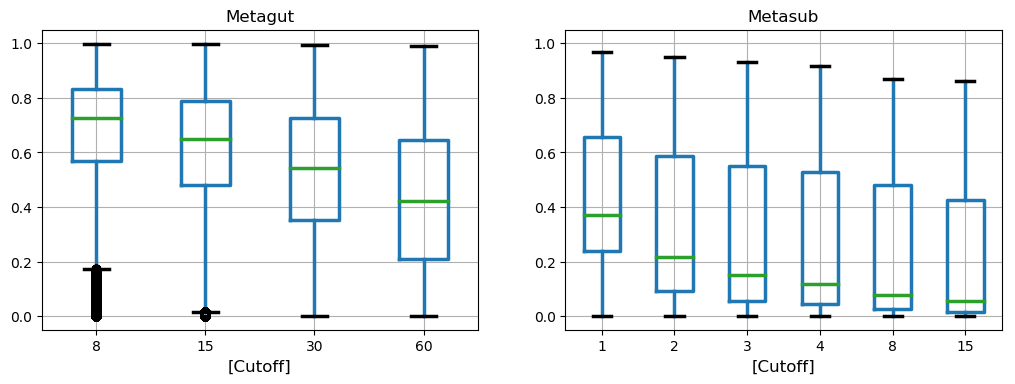

In [44]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

df_ = df[df.Data == 'Metagut']
ax_ = ax[0]
df_.boxplot(ax=ax_, by='Cutoff',
            boxprops={'linewidth': 2.5},
            medianprops={'linewidth': 2.5},
            whiskerprops={'linewidth': 2.5},
            capprops={'linewidth': 2.5},
           )
ax_.set_title(df_.Data.iloc[0])
ax_.set_ylim([-0.05, 1.05])
ax_.set_ylabel('Ratio of reads remaining')

df_ = df[df.Data == 'Metasub']
ax_ = ax[1]
df_.boxplot(ax=ax_, by='Cutoff',
            boxprops={'linewidth': 2.5},
            medianprops={'linewidth': 2.5},
            whiskerprops={'linewidth': 2.5},
            capprops={'linewidth': 2.5},
           )
ax_.set_title(df_.Data.iloc[0])
ax_.set_ylim([-0.05, 1.05])
ax_.set_ylabel('Ratio of reads remaining')

fig.suptitle('')

plt.show()

### Files

In [24]:
import glob
import re
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt
%matplotlib inline

In [25]:
def get_ratios(filename):
    df = pd.read_csv(filename, sep='\t')
    df = df.loc[df['File'] != 'File']
    df.File = df.File.apply(lambda x: '.'.join(x.split('.')[:-1]))
    df['Ratio'] = df['Remaining ratio'].astype(float)
    del df['Remaining ratio']
    return df


def load_stats(get_ratios, metasub=True, metagut=True):
    df = pd.DataFrame(columns=['Ratio', 'Cutoff', 'Data'])

    if metasub:
        df_new = get_ratios('scripts/metasub/filter_stats_1.txt')
        df_new['Cutoff'] = 1
        df_new['Data'] = 'Metasub'
        df = pd.concat((df, df_new), sort=True)

        df_new = get_ratios('scripts/metasub/filter_stats_2.txt')
        df_new['Cutoff'] = 2
        df_new['Data'] = 'Metasub'
        df = pd.concat((df, df_new), sort=True)

        df_new = get_ratios('scripts/metasub/filter_stats_3.txt')
        df_new['Cutoff'] = 3
        df_new['Data'] = 'Metasub'
        df = pd.concat((df, df_new), sort=True)

        df_new = get_ratios('scripts/metasub/filter_stats_4.txt')
        df_new['Cutoff'] = 4
        df_new['Data'] = 'Metasub'
        df = pd.concat((df, df_new), sort=True)

        df_new = get_ratios('scripts/metasub/filter_stats_8.txt')
        df_new['Cutoff'] = 8
        df_new['Data'] = 'Metasub'
        df = pd.concat((df, df_new), sort=True)

        df_new = get_ratios('scripts/metasub/filter_stats_15.txt')
        df_new['Cutoff'] = 15
        df_new['Data'] = 'Metasub'
        df = pd.concat((df, df_new), sort=True)

    if metagut:
        df_new = get_ratios('scripts/human/filter_stats_8.txt')
        df_new['Cutoff'] = 8
        df_new['Data'] = 'Metagut'
        df = pd.concat((df, df_new), sort=True)

        df_new = get_ratios('scripts/human/filter_stats_15.txt')
        df_new['Cutoff'] = 15
        df_new['Data'] = 'Metagut'
        df = pd.concat((df, df_new), sort=True)

        df_new = get_ratios('scripts/human/filter_stats_30.txt')
        df_new['Cutoff'] = 30
        df_new['Data'] = 'Metagut'
        df = pd.concat((df, df_new), sort=True)

        df_new = get_ratios('scripts/human/filter_stats_60.txt')
        df_new['Cutoff'] = 60
        df_new['Data'] = 'Metagut'
        df = pd.concat((df, df_new), sort=True)

    return df

In [26]:
df = load_stats(get_ratios)

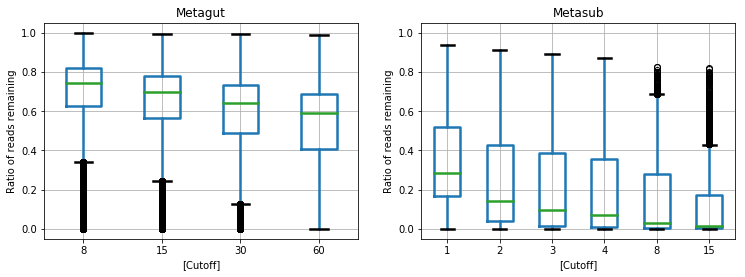

In [27]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

df_ = df[df.Data == 'Metagut']
ax_ = ax[0]
df_.boxplot(ax=ax_, by='Cutoff',
            boxprops={'linewidth': 2.5},
            medianprops={'linewidth': 2.5},
            whiskerprops={'linewidth': 2.5},
            capprops={'linewidth': 2.5},
           )
ax_.set_title(df_.Data.iloc[0])
ax_.set_ylim([-0.05, 1.05])
ax_.set_ylabel('Ratio of reads remaining')

df_ = df[df.Data == 'Metasub']
ax_ = ax[1]
df_.boxplot(ax=ax_, by='Cutoff',
            boxprops={'linewidth': 2.5},
            medianprops={'linewidth': 2.5},
            whiskerprops={'linewidth': 2.5},
            capprops={'linewidth': 2.5},
           )
ax_.set_title(df_.Data.iloc[0])
ax_.set_ylim([-0.05, 1.05])
ax_.set_ylabel('Ratio of reads remaining')

fig.suptitle('')

plt.show()

In [28]:
df.loc[df.Data == 'Metasub', 'Size'] = df.loc[df.Data == 'Metasub', 'File'].apply(lambda x: os.path.getsize(x))

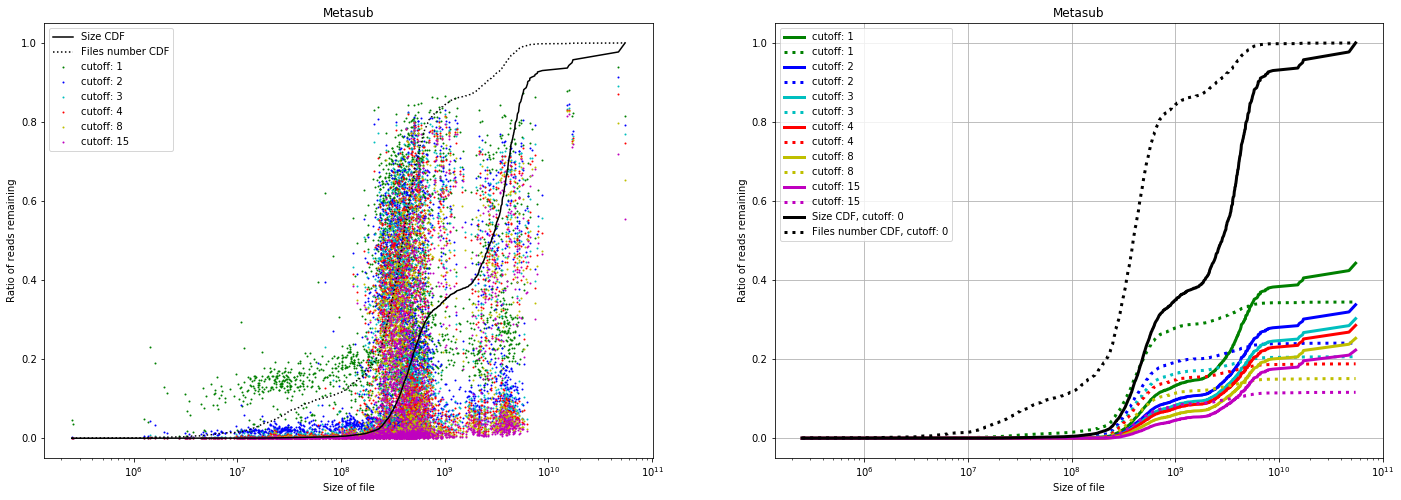

In [30]:
fig, ax = plt.subplots(1, 2, figsize=(24, 8))

colors = ['g', 'b', 'c', 'r', 'y', 'm']

df_ = df[df.Data == 'Metasub']
ax_ = ax[0]
for c, cutoff in enumerate(pd.unique(df_.Cutoff)):
    df_[df_.Cutoff == cutoff].plot.scatter('Size', 'Ratio', label='cutoff: {}'.format(cutoff), c=colors[c], s=1, ax=ax_)

sizes = pd.Series(sorted(df_.loc[df_.Cutoff == cutoff, 'Size'].values))
sizes_cdf = pd.DataFrame.cumsum(sizes)
ax_.plot(sizes, sizes_cdf / sizes_cdf.iloc[-1], label='Size CDF', c='black')
files_cdf = np.arange(1, len(sizes) + 1) / len(sizes)
ax_.plot(sizes, files_cdf / files_cdf[-1], label='Files number CDF', c='black', linestyle=':')
ax_.legend()

ax_.set_title(df_.Data.iloc[0])
ax_.set_ylim([-0.05, 1.05])
ax_.set_xscale('log')
ax_.set_ylabel('Ratio of reads remaining')
ax_.set_xlabel('Size of file')

df_ = df[df.Data == 'Metasub']
ax_ = ax[1]
for c, cutoff in enumerate(pd.unique(df_.Cutoff)):
    x = df_[df_.Cutoff == cutoff].sort_values(by='Size')
    x['Size CDF'] = (x['Size'] * x['Ratio']).cumsum() / x['Size'].sum()
    x['Files number CDF'] = x['Ratio'].cumsum() / x.shape[0]
    x.plot('Size', 'Size CDF', label='cutoff: {}'.format(cutoff), c=colors[c], linewidth=3, ax=ax_)
    x.plot('Size', 'Files number CDF', label='cutoff: {}'.format(cutoff), c=colors[c], linestyle=':', linewidth=3, ax=ax_)

sizes = pd.Series(sorted(df_.loc[df_.Cutoff == cutoff, 'Size'].values))
sizes_cdf = pd.DataFrame.cumsum(sizes)
ax_.plot(sizes, sizes_cdf / sizes_cdf.iloc[-1], label='Size CDF, cutoff: 0', c='black', linewidth=3, )
files_cdf = np.arange(1, len(sizes) + 1) / len(sizes)
ax_.plot(sizes, files_cdf / files_cdf[-1], label='Files number CDF, cutoff: 0', c='black', linestyle=':', linewidth=3, )
ax_.legend()

ax_.set_title(df_.Data.iloc[0])
ax_.set_ylim([-0.05, 1.05])
ax_.set_xscale('log')
ax_.set_ylabel('Ratio of reads remaining')
ax_.set_xlabel('Size of file')
ax_.grid()

fig.suptitle('')

plt.show()

In [46]:
def get_ratios(filename):
    df = pd.read_csv(filename, sep='\t')
    df = df.loc[df['File'] != 'File']
    df.File = df.File.apply(lambda x: x.split('/')[-1].split('.')[0])
    df.index = df.File
    idx = pd.Index(pd.read_csv('scripts/human/runs_human_gut_WGS.csv', header=None)[0].values)
    df = df.loc[idx.intersection(df.index)]
    df['Ratio'] = df['Remaining ratio'].astype(float)
    del df['Remaining ratio']
    return df

df = load_stats(get_ratios, False)
df['Subset'] = 'WGS'

def get_ratios(filename):
    df = pd.read_csv(filename, sep='\t')
    df = df.loc[df['File'] != 'File']
    df.File = df.File.apply(lambda x: x.split('/')[-1].split('.')[0])
    df.index = df.File
    idx = pd.Index(pd.read_csv('scripts/human/runs_human_gut_AMPLICON.csv', header=None)[0].values)
    df = df.loc[idx.intersection(df.index)]
    df['Ratio'] = df['Remaining ratio'].astype(float)
    del df['Remaining ratio']
    return df

df_ = load_stats(get_ratios, False)
df_['Subset'] = 'AMPLICON'

df = pd.concat((df, df_), sort=True)

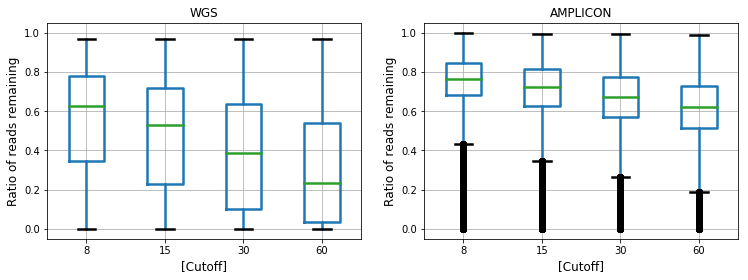

In [49]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

df_ = df[df.Subset == 'WGS']
ax_ = ax[0]
df_.boxplot(ax=ax_, by='Cutoff',
            boxprops={'linewidth': 2.5},
            medianprops={'linewidth': 2.5},
            whiskerprops={'linewidth': 2.5},
            capprops={'linewidth': 2.5},
           )
ax_.set_title(df_.Subset.iloc[0])
ax_.set_ylim([-0.05, 1.05])
ax_.set_ylabel('Ratio of reads remaining')

df_ = df[df.Subset == 'AMPLICON']
ax_ = ax[1]
df_.boxplot(ax=ax_, by='Cutoff',
            boxprops={'linewidth': 2.5},
            medianprops={'linewidth': 2.5},
            whiskerprops={'linewidth': 2.5},
            capprops={'linewidth': 2.5},
           )
ax_.set_title(df_.Subset.iloc[0])
ax_.set_ylim([-0.05, 1.05])
ax_.set_ylabel('Ratio of reads remaining')

fig.suptitle('')

plt.show()

In [66]:
df.loc[df.Data == 'Metagut', 'Size'] = df.loc[df.Data == 'Metagut', 'File'].apply(lambda x: os.path.getsize('/cluster/work/grlab/projects/metagenome/benchmark_human_metagenome/nobackup/human_gut_sra/{}.trimfq_0.02.fastq.gz'.format(x)))

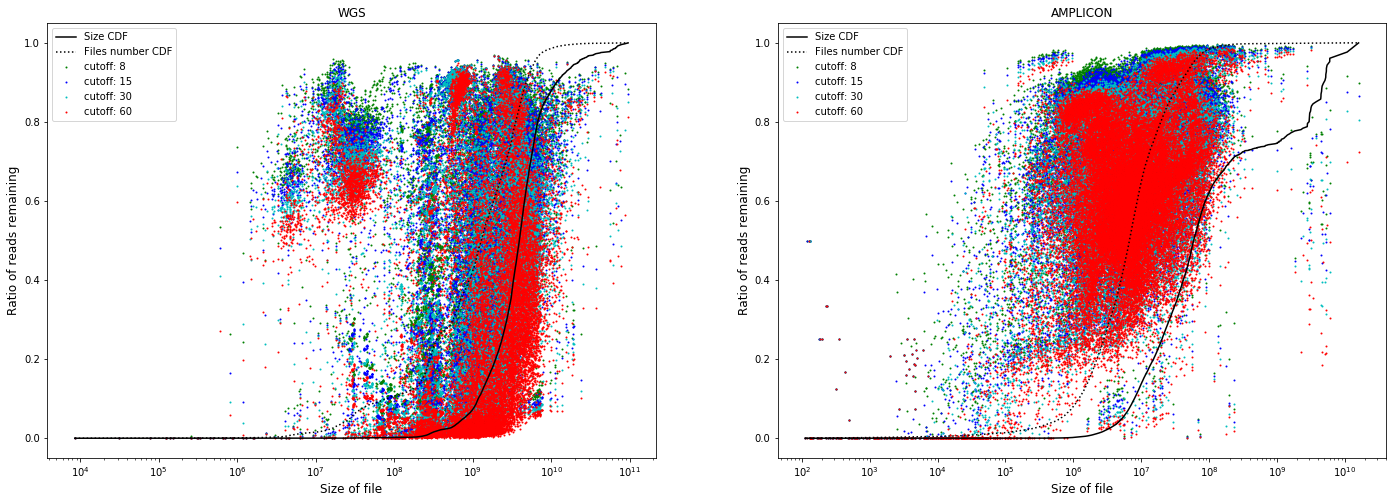

In [136]:
fig, ax = plt.subplots(1, 2, figsize=(24, 8))

colors = ['g', 'b', 'c', 'r']

df_ = df[df.Subset == 'WGS']
ax_ = ax[0]
for c, cutoff in enumerate(pd.unique(df_.Cutoff)):
    df_[df_.Cutoff == cutoff].plot.scatter('Size', 'Ratio', label='cutoff: {}'.format(cutoff), c=colors[c], s=1, ax=ax_)

sizes = pd.Series(sorted(df_.loc[df_.Cutoff == cutoff, 'Size'].values))
sizes_cdf = pd.DataFrame.cumsum(sizes)
ax_.plot(sizes, sizes_cdf / sizes_cdf.iloc[-1], label='Size CDF', c='black')
files_cdf = np.arange(1, len(sizes) + 1) / len(sizes)
ax_.plot(sizes, files_cdf / files_cdf[-1], label='Files number CDF', c='black', linestyle=':')
ax_.legend()

ax_.set_title(df_.Subset.iloc[0])
ax_.set_ylim([-0.05, 1.05])
ax_.set_xscale('log')
ax_.set_ylabel('Ratio of reads remaining')
ax_.set_xlabel('Size of file')

df_ = df[df.Subset == 'AMPLICON']
ax_ = ax[1]
for c, cutoff in enumerate(pd.unique(df_.Cutoff)):
    df_[df_.Cutoff == cutoff].plot.scatter('Size', 'Ratio', label='cutoff: {}'.format(cutoff), c=colors[c], s=1, ax=ax_)

sizes = pd.Series(sorted(df_.loc[df_.Cutoff == cutoff, 'Size'].values))
sizes_cdf = pd.DataFrame.cumsum(sizes)
ax_.plot(sizes, sizes_cdf / sizes_cdf.iloc[-1], label='Size CDF', c='black')
files_cdf = np.arange(1, len(sizes) + 1) / len(sizes)
ax_.plot(sizes, files_cdf / files_cdf[-1], label='Files number CDF', c='black', linestyle=':')
ax_.legend()

ax_.set_title(df_.Subset.iloc[0])
ax_.set_ylim([-0.05, 1.05])
ax_.set_xscale('log')
ax_.set_ylabel('Ratio of reads remaining')
ax_.set_xlabel('Size of file')

fig.suptitle('')

plt.show()

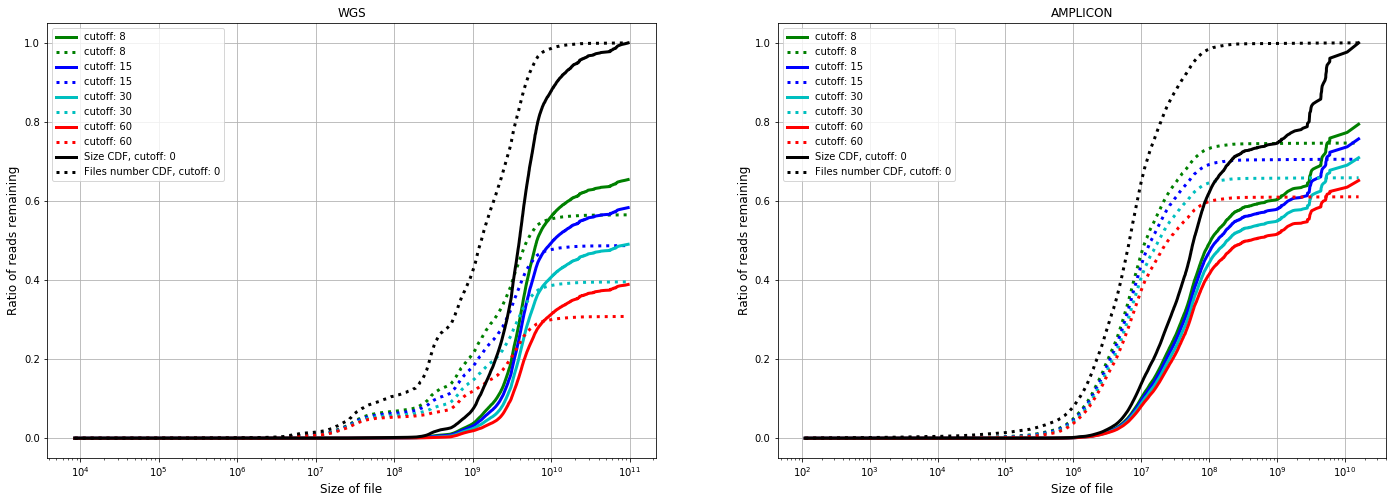

In [144]:
fig, ax = plt.subplots(1, 2, figsize=(24, 8))

colors = ['g', 'b', 'c', 'r']

df_ = df[df.Subset == 'WGS']
ax_ = ax[0]
for c, cutoff in enumerate(pd.unique(df_.Cutoff)):
    x = df_[df_.Cutoff == cutoff].sort_values(by='Size')
    x['Size CDF'] = (x['Size'] * x['Ratio']).cumsum() / x['Size'].sum()
    x['Files number CDF'] = x['Ratio'].cumsum() / x.shape[0]
    x.plot('Size', 'Size CDF', label='cutoff: {}'.format(cutoff), c=colors[c], linewidth=3, ax=ax_)
    x.plot('Size', 'Files number CDF', label='cutoff: {}'.format(cutoff), c=colors[c], linestyle=':', linewidth=3, ax=ax_)

sizes = pd.Series(sorted(df_.loc[df_.Cutoff == cutoff, 'Size'].values))
sizes_cdf = pd.DataFrame.cumsum(sizes)
ax_.plot(sizes, sizes_cdf / sizes_cdf.iloc[-1], label='Size CDF, cutoff: 0', c='black', linewidth=3, )
files_cdf = np.arange(1, len(sizes) + 1) / len(sizes)
ax_.plot(sizes, files_cdf / files_cdf[-1], label='Files number CDF, cutoff: 0', c='black', linestyle=':', linewidth=3, )
ax_.legend()

ax_.set_title(df_.Subset.iloc[0])
ax_.set_ylim([-0.05, 1.05])
ax_.set_xscale('log')
ax_.set_ylabel('Ratio of reads remaining')
ax_.set_xlabel('Size of file')
ax_.grid()

df_ = df[df.Subset == 'AMPLICON']
ax_ = ax[1]
for c, cutoff in enumerate(pd.unique(df_.Cutoff)):
    x = df_[df_.Cutoff == cutoff].sort_values(by='Size')
    x['Size CDF'] = (x['Size'] * x['Ratio']).cumsum() / x['Size'].sum()
    x['Files number CDF'] = x['Ratio'].cumsum() / x.shape[0]
    x.plot('Size', 'Size CDF', label='cutoff: {}'.format(cutoff), c=colors[c], linewidth=3, ax=ax_)
    x.plot('Size', 'Files number CDF', label='cutoff: {}'.format(cutoff), c=colors[c], linestyle=':', linewidth=3, ax=ax_)

sizes = pd.Series(sorted(df_.loc[df_.Cutoff == cutoff, 'Size'].values))
sizes_cdf = pd.DataFrame.cumsum(sizes)
ax_.plot(sizes, sizes_cdf / sizes_cdf.iloc[-1], label='Size CDF, cutoff: 0', c='black', linewidth=3, )
files_cdf = np.arange(1, len(sizes) + 1) / len(sizes)
ax_.plot(sizes, files_cdf / files_cdf[-1], label='Files number CDF, cutoff: 0', c='black', linestyle=':', linewidth=3, )
ax_.legend()

ax_.set_title(df_.Subset.iloc[0])
ax_.set_ylim([-0.05, 1.05])
ax_.set_xscale('log')
ax_.set_ylabel('Ratio of reads remaining')
ax_.set_xlabel('Size of file')
ax_.grid()

fig.suptitle('')

plt.show()